## Описание проекта

**Описание проекта**

Компания «Работа с заботой» стремится оптимизировать управление персоналом, минимизировать отток сотрудников и избежать финансовых потерь с помощью данных и машинного обучения.

**Цель проекта**

- Построить модель для предсказания уровня удовлетворённости сотрудников на основе предоставленных характеристик (Задача 1).
- Построить модель для предсказания вероятности увольнения сотрудников (Задача 2).

**Ход исследования:**

**Задача 1: Предсказание уровня удовлетворённости**

- *Шаг 1: [Загрузка данных](#Загрузка)*

  - Проверка загруженных данных на наличие ошибок.

  - Удостоверение в корректном разделении данных на тренировочные и тестовые.

- *Шаг 2: [Предобработка данных](Предобработка)*

  - Изучение пропусков, дубликатов, выбросов.

  - Принятие решения о кодировании категориальных признаков (dept, level).

  - Разработка пайплайна для автоматизации обработки данных.

- *Шаг 3: [Исследовательский анализ данных](#Исследовательский)*

  - Построение распределений для каждого признака.

  - Оценка корреляций между признаками и целевой переменной.

  - Проверка данных на предмет мультиколлинеарности.

- *Шаг 4: [Подготовка данных](#Подготовка)*

  - Реализация пайплайна: кодирование, масштабирование, устранение выбросов, заполнение пропусков.

  - Применение двух подходов к кодированию (например, OneHotEncoder и OrdinalEncoder).

- *Шаг 5: [Обучение моделей](#Обучение)*

  - Реализация двух моделей:

    - Линейная регрессия.

    - Решающее дерево.

  - Подбор гиперпараметров с использованием, например, GridSearchCV.

  - Добавление функции для расчёта SMAPE.

  - Сравнение моделей и выбор лучшей.

- *Шаг 6: [Выводы](#Выводы)*

  - Сравнение результатов моделей.

  - Обоснование выбора лучшей модели.

**Задача 2: Предсказание увольнения**

- *Шаг 1: [Загрузка данных](#загрузка)*

  - Проверка целевых данных на наличие ошибок.

  - Проверка консистентности данных.

- *Шаг 2: [Предобработка данных](#предобработка)*

  - Применение пайплайна, созданного в задаче 1, с адаптацией к новым целям.

- *Шаг 3: [Исследовательский анализ данных](#исследовательский)*

  - Изучение признаков, связанных с увольнениями:

  - Определение средних зарплат уволившихся сотрудников.

  - Анализ отделов, наиболее подверженных оттоку.

  - Сравнение распределений уровня удовлетворённости между оставшимися и уволившимися.

- *Шаг 4: [Добавление нового признака](#добавление)*

  - Использование предсказаний модели из задачи 1 для пополнения признаков.
  
- *Шаг 5: [Подготовка данных](#родготовка)*

  - Реализация пайплайна: кодирование, масштабирование, устранение выбросов, заполнение пропусков.

  - Применение двух подходов к кодированию (например, OneHotEncoder и OrdinalEncoder).

- *Шаг 6: [Обучение моделей](#обучение)*

  - Обучение трёх моделей:

  - Логистическая регрессия.

  - RandomForestRegressor.

  - Градиентный бустинг.

  - Подбор гиперпараметров как минимум для двух моделей.

  - Критерий успеха: ROC-AUC ≥0.91 на тестовой выборке.
  - Выбор лучшей модели

- *Шаг 7: [Выводы](#выводы)*

  - Формулирование выводов о качестве работы моделей.

  - Обоснование выбора лучшей модели.

- *[Общий вывод](#общий)*

  - Описание бизнес-задач.

  - Приведение результатов по каждой задаче.

  - Формулирование рекомендаций для HR-отдела:

  - Предложения действий, способствующих предотвращению увольнений.

  - Меры по улучшению уровня удовлетворённости сотрудников.

**Описание данных**

Датасет включает следующие признаки:

- `id` — уникальный идентификатор сотрудника;
- `dept` — отдел, в котором работает сотрудник;
- `level` — уровень занимаемой должности;
- `workload` — уровень загруженности сотрудника;
- `employment_years` — длительность работы в компании (в годах);
- `last_year_promo` — показывает, было ли повышение за последний год;
- `last_year_violations` — показывает, нарушал ли сотрудник трудовой договор за последний год;
- `supervisor_evaluation` — оценка качества работы сотрудника, которую дал руководитель;
- `salary` — ежемесячная зарплата сотрудника;
- `job_satisfaction_rate` — уровень удовлетворённости сотрудника работой в компании, целевой признак.

Метрики для оценки: `SMAPE` (задача 1), `ROC-AUC` (задача 2).

## Задача 1: Предсказание уровня удовлетворённости
<a id='Загрузка'></a>
### Загрузка данных
**Импорт модулей:**

In [ ]:
#%pip install -q --upgrade numba
%pip install -q "numpy<1.25"
%pip install -q phik shap lightgbm
%pip install -q --upgrade scipy scikit-learn

**Импорт библиотек**:

In [1]:
import warnings
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import shap
from phik import phik_matrix
from scipy.stats import chi2_contingency  
from sklearn.dummy import DummyRegressor
from phik.report import plot_correlation_matrix
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from scipy import stats
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# Константы
RANDOM_STATE = 42

In [3]:
# Загружаем данные
job_X_train = pd.read_csv('/datasets/train_job_satisfaction_rate.csv')
job_X_test = pd.read_csv('/datasets/test_features.csv')
job_y_test = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv')

In [4]:
def detailed_df_analysis(df):
    """
    Создадим функцию, чтобы получить расширенную первичную информацию по таблице данных.
    
    """
    display(df.head())
    print('')
    display(df.info())
    print('')
    display(df.describe().T)
    print('')
    # Пропущенные значения
    missing_values = df.isnull().sum()
    missing_percent = (missing_values / len(df)) * 100
    print("Пропущенные значения:")
    print(pd.DataFrame({'count': missing_values, 'percentage': missing_percent}), "\n")

    # Количество дубликатов строк
    duplicates = df.duplicated().sum()
    print(f"Количество дубликатов: {duplicates}\n")

    # Информация по категориальным столбцам
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    if len(categorical_cols) > 0:
        print("Информация о категориальных признаках:")
        for col in categorical_cols:
            unique_count = df[col].nunique()
            unique_values = df[col].unique()
            print(f"{col} => {unique_count} уникальных значений")
            for value in unique_values:
                print(f"  - {value}")
            print()
    else:
        print("Категориальные признаки отсутствуют.\n")

In [5]:
detailed_df_analysis(job_X_train)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


None

,count,mean,std,min,25%,50%,75%,max
id,4000.0,544957.621000,257883.104622,100954.00,322836.75,534082.50,771446.00,999521.0
employment_years,4000.0,3.718500,2.542513,1.00,2.00,3.00,6.00,10.0
supervisor_evaluation,4000.0,3.476500,1.008812,1.00,3.00,4.00,4.00,5.0
salary,4000.0,33926.700000,14900.703838,12000.00,22800.00,30000.00,43200.00,98400.0
job_satisfaction_rate,4000.0,0.533995,0.225327,0.03,0.36,0.56,0.71,1.0



Пропущенные значения:
                       count  percentage
id                         0        0.00
dept                       6        0.15
level                      4        0.10
workload                   0        0.00
employment_years           0        0.00
last_year_promo            0        0.00
last_year_violations       0        0.00
supervisor_evaluation      0        0.00
salary                     0        0.00
job_satisfaction_rate      0        0.00 

Количество дубликатов: 0

Информация о категориальных признаках:
dept => 5 уникальных значений
  - sales
  - hr
  - technology
  - purchasing
  - marketing
  - nan

level => 3 уникальных значений
  - junior
  - middle
  - sinior
  - nan

workload => 3 уникальных значений
  - medium
  - high
  - low

last_year_promo => 2 уникальных значений
  - no
  - yes

last_year_violations => 2 уникальных значений
  - no
  - yes



- Есть пропущенные значения в столбцах `dept` и `level`
- Орфаграфическая ошибка в `sinior` параметра `level`
- Явные дубликаты не обнаружены
- Предварительно, аномальных значений не обнаружено, но присутствуют выбросах в параметрах `employment_years`и `salary`, так как максимальные значения сильно отличаются от третей квартили. Изучим их на исследовательском этапе.
- С типами данных все в порядке

In [6]:
detailed_df_analysis(job_X_test)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


None

,count,mean,std,min,25%,50%,75%,max
id,2000.0,552765.2135,253851.326129,100298.0,339052.0,550793.0,765763.75,999029.0
employment_years,2000.0,3.6665,2.537222,1.0,1.0,3.0,6.00,10.0
supervisor_evaluation,2000.0,3.5265,0.996892,1.0,3.0,4.0,4.00,5.0
salary,2000.0,34066.8000,15398.436729,12000.0,22800.0,30000.0,43200.00,96000.0



Пропущенные значения:
                       count  percentage
id                         0        0.00
dept                       2        0.10
level                      1        0.05
workload                   0        0.00
employment_years           0        0.00
last_year_promo            0        0.00
last_year_violations       0        0.00
supervisor_evaluation      0        0.00
salary                     0        0.00 

Количество дубликатов: 0

Информация о категориальных признаках:
dept => 6 уникальных значений
  - marketing
  - hr
  - sales
  - purchasing
  - technology
  - nan
  -  

level => 3 уникальных значений
  - junior
  - middle
  - sinior
  - nan

workload => 4 уникальных значений
  - medium
  - low
  - high
  -  

last_year_promo => 2 уникальных значений
  - no
  - yes

last_year_violations => 2 уникальных значений
  - no
  - yes



- Есть пропущенные значения в столбцах `dept`, `level` и `workload` в виде `NaN` и `" "` в последних двух параметрах.
- Орфаграфическая ошибка в `sinior` апарметра `level`
- Явные дубликаты не обнаружены
- Предварительно, аномальных значений не обнаружено, но присутствуют выбросах в параметрах `employment_years`и `salary`, так как максимальные значения сильно отличаются от третей квартили. Изучим их на исследовательском этапе.
- С типами данных все в порядке

In [7]:
detailed_df_analysis(job_y_test)

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


None

,count,mean,std,min,25%,50%,75%,max
id,2000.0,552765.21350,253851.326129,100298.00,339052.00,550793.00,765763.75,999029.0
job_satisfaction_rate,2000.0,0.54878,0.220110,0.03,0.38,0.58,0.72,1.0



Пропущенные значения:
                       count  percentage
id                         0         0.0
job_satisfaction_rate      0         0.0 

Количество дубликатов: 0

Категориальные признаки отсутствуют.



- Пропущенных значений не обнаружено
- Явные дубликаты не обнаружены
- Предварительно, аномальных значений не обнаружено
- С типами данных все в порядке

<a id='Предобработка'></a>
### Предобработка данных

In [8]:
# Исправим орфографическую ошибку
#job_X_train['level'].replace({'sinior': 'senior'}, inplace=True)

In [9]:
# Пайплайн для замены пропущенных значений
imputer_pipe = Pipeline(
    [
        (
            'SimpleImputer',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
    ]
)

In [10]:
# Выведем все строки с пропущенными значениями в датасете
job_X_train[job_X_train['dept'].isnull() | job_X_train['level'].isnull()]

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
1209,631073,sales,NaN,medium,1,no,no,4,27600,0.66
1469,416327,sales,NaN,low,1,no,no,5,18000,0.73
1526,694746,NaN,junior,medium,5,no,no,4,21600,0.62
1630,814624,NaN,junior,medium,3,no,no,4,24000,0.88
1633,475114,NaN,junior,high,4,no,no,4,31200,0.63
1745,135043,sales,NaN,medium,1,no,no,3,26400,0.30
2522,998838,sales,NaN,medium,1,no,no,5,27600,0.71
2781,497243,NaN,junior,medium,1,no,no,3,26400,0.28
2975,168668,NaN,junior,low,3,no,no,4,18000,0.88
3866,641150,NaN,junior,low,3,no,yes,4,12000,0.54


In [11]:
# Обработаем пропущенные значения при помощи пайплайна
nan_cols = ['dept', 'level']
job_X_train[nan_cols] = imputer_pipe.fit_transform(job_X_train[nan_cols])

# Проверка
display(job_X_train[job_X_train['dept'].isnull() | job_X_train['level'].isnull()])
print(f'Количество пропущенных значений после замены: \n {job_X_train.isna().sum()}')

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate


Количество пропущенных значений после замены: 
 id                       0
dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64


**Для `job_X_train`:**

- Исправили орфографическую ошибку `sinior` -> `senior` в столбце `level`
- Заменили пропущенные значения `NaN` в параметрах `dept`и `level` при помощи пайплайна (SimpleImputer)

<a id='Исследовательский'></a>
### Исследовательский анализ данных

#### Построение распределений для каждого признака:

In [12]:
def numeric_plot(df):
    """
    Строит гистограммы или столбчатые диаграммы и ящики с усами для числовых столбцов,
    в зависимости от их типа (вещественные или дискретные), исключая 'id'.
    """
    # Задаем размер графиков
    plt.rcParams["figure.figsize"] = (18, 15)

    # Выбор числовых столбцов, исключая 'id', если он есть
    numeric_cols = df.select_dtypes(include=['number']).columns
    numeric_cols = numeric_cols.drop('id', errors='ignore')
    
    # Если числовых столбцов нет, вывести сообщение и завершить функцию
    if len(numeric_cols) == 0:
        print("Числовые столбцы отсутствуют.")
        return

    # Количество строк и столбцов в сетке графиков
    num_cols = 2  # По два графика (гистограмма/бар и boxplot) в строке
    num_rows = len(numeric_cols)

    # Создание фигуры
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
    axes = axes.flatten()  # Упрощаем доступ к осям
    
    # Построение графиков
    for i, col in enumerate(numeric_cols):
        unique_values = df[col].nunique()

        # Вещественные данные — строим гистограмму
        if df[col].dtype == 'float':
            sns.histplot(df[col], bins=15, kde=False, color="skyblue", ax=axes[2 * i])
            axes[2 * i].set_title(f'Гистограмма для {col}')
            axes[2 * i].set_xlabel(col)
            axes[2 * i].set_ylabel('Частота')
        
        # Дискретные данные — строим либо столбчатую диаграмму, либо гистограмму
        elif df[col].dtype == 'int':
            if unique_values > 20:
                sns.histplot(df[col], bins=15, kde=False, color="skyblue", ax=axes[2 * i])
                axes[2 * i].set_title(f'Гистограмма для {col}')
            else:
                sns.countplot(x=df[col], color="skyblue", ax=axes[2 * i])
                axes[2 * i].set_title(f'Столбчатая диаграмма для {col}')
            axes[2 * i].set_xlabel(col)
            axes[2 * i].set_ylabel('Count')

        # Ящик с усами
        sns.boxplot(x=df[col], color="skyblue", ax=axes[2 * i + 1])
        axes[2 * i + 1].set_title(f'Ящик с усами для {col}')
        axes[2 * i + 1].set_xlabel(col)

    plt.tight_layout()
    plt.show()

In [13]:
def categorical_target_plot(data, target):
    """
    Функция строит графики для всех категориальных признаков датасета.

    Args:
        data (pandas.DataFrame): Датасет.
        target (str): Целевой признак.

    Returns:
        None
    """
    # Задаем размер графиков
    plt.rcParams["figure.figsize"] = (18, 6)

    # Выбираем категориальные столбцы
    categorical_columns = data.select_dtypes(exclude='number').columns.tolist()

    # Построение графиков
    for i, feature in enumerate(categorical_columns):
        plt.subplot(1, len(categorical_columns), i + 1)  # Количество графиков в строке = числу категориальных признаков
        sns.boxplot(data=data, x=feature, y=target)
        plt.title(feature)
        plt.xlabel('')
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


In [14]:
def plot_pie_and_bar_charts(df):
    """
    Строит пай-чарты и столбчатые диаграммы для каждого категориального признака в DataFrame.
    """
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns

    num_charts = len(categorical_cols)

    # Создаем фигуру и оси. Фиксированный размер фигуры для лучшего контроля
    fig, axes = plt.subplots(num_charts, 2, figsize=(12, 5 * num_charts)) #Увеличение высоты пропорционально количеству графиков

    # Преобразуем axes в двумерный массив, даже если только один график
    if num_charts == 1:
        axes = axes.reshape(1, 2)

    for i, col in enumerate(categorical_cols):
        value_counts = df[col].value_counts()

        # Pie chart
        axes[i, 0].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10}) # Увеличил размер текста в pie chart
        axes[i, 0].set_title(f'Пай чарт для {col}', fontsize=12) # Увеличил размер заголовка

        # Bar chart
        axes[i, 1].bar(value_counts.index, value_counts.values, color='skyblue')
        axes[i, 1].set_title(f'Столбчатая диаграмма для {col}', fontsize=12) # Увеличил размер заголовка
        axes[i, 1].set_ylabel('Count', fontsize=10) # Увеличил размер подписи оси
        axes[i, 1].set_xlabel(col, fontsize=10) # Увеличил размер подписи оси
        axes[i, 1].tick_params(axis='x', rotation=45, labelsize=10) # Увеличил размер подписей и повернул их
        axes[i, 1].tick_params(axis='y', labelsize=10) # Увеличил размер подписей

    plt.tight_layout(pad=2.0) # Автоматическая настройка отступов, pad - отступ от границ
    plt.show()

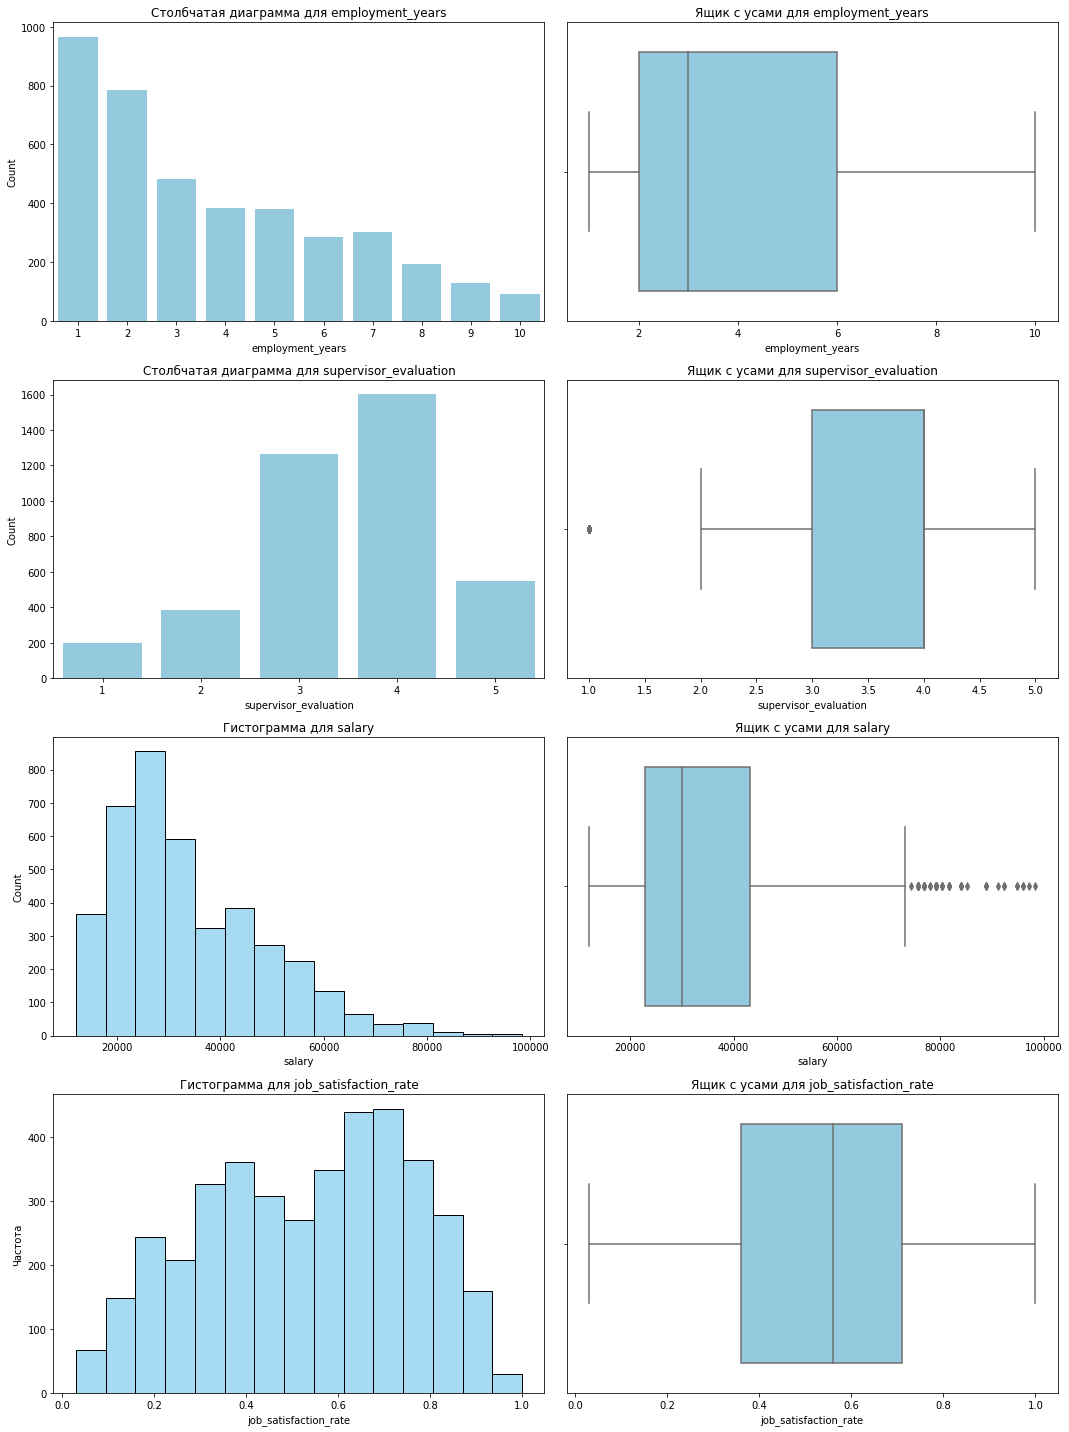

In [15]:
numeric_plot(job_X_train)

- Признак `employment_years` распределен неправильно. Присутствует скошенность вправо. В компании практически в 2 раза больше сотрудников, которые работают в ней до 3х лет: опытных сотрудников намного меньше. Это стоит учесть это при подборе параметров для модели.
- Самая частая оценка качества работы сотрудника, которую давал руководитель - 4.
- Признак `salary` имеет скошенное вправо распределение. Это говорит о небольшом количестве сотрудников с высокой зарплатой, в то время как медианная зарплата в компании - 30 000. На графике видны выбросы, однако убирать их не будем в связи с их небольшим количеством и репрезентативностью высоких зарплат сотрудников. Разброс достаточно велик, поэтому стоит применить масштабирование.
- Признак `job_satisfaction_rate` имеет неправильное распределение немного скошенное влево с тремя пиками. 

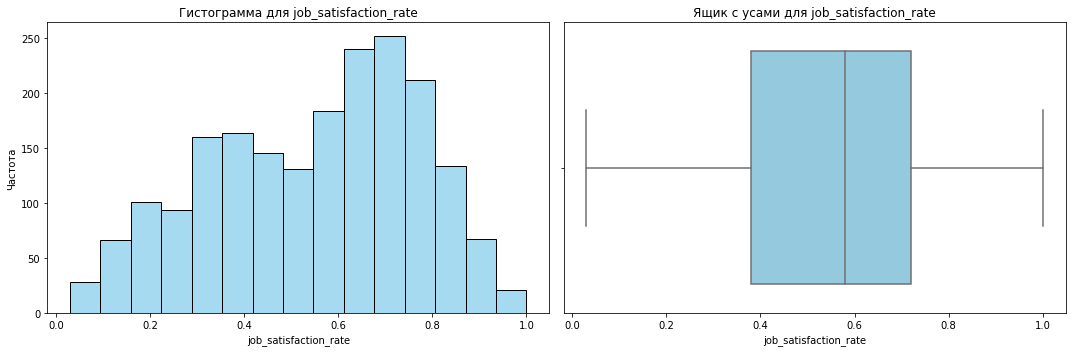

In [16]:
numeric_plot(job_y_test)

Целевой признак тестовой выборки идентичен тренировочной.

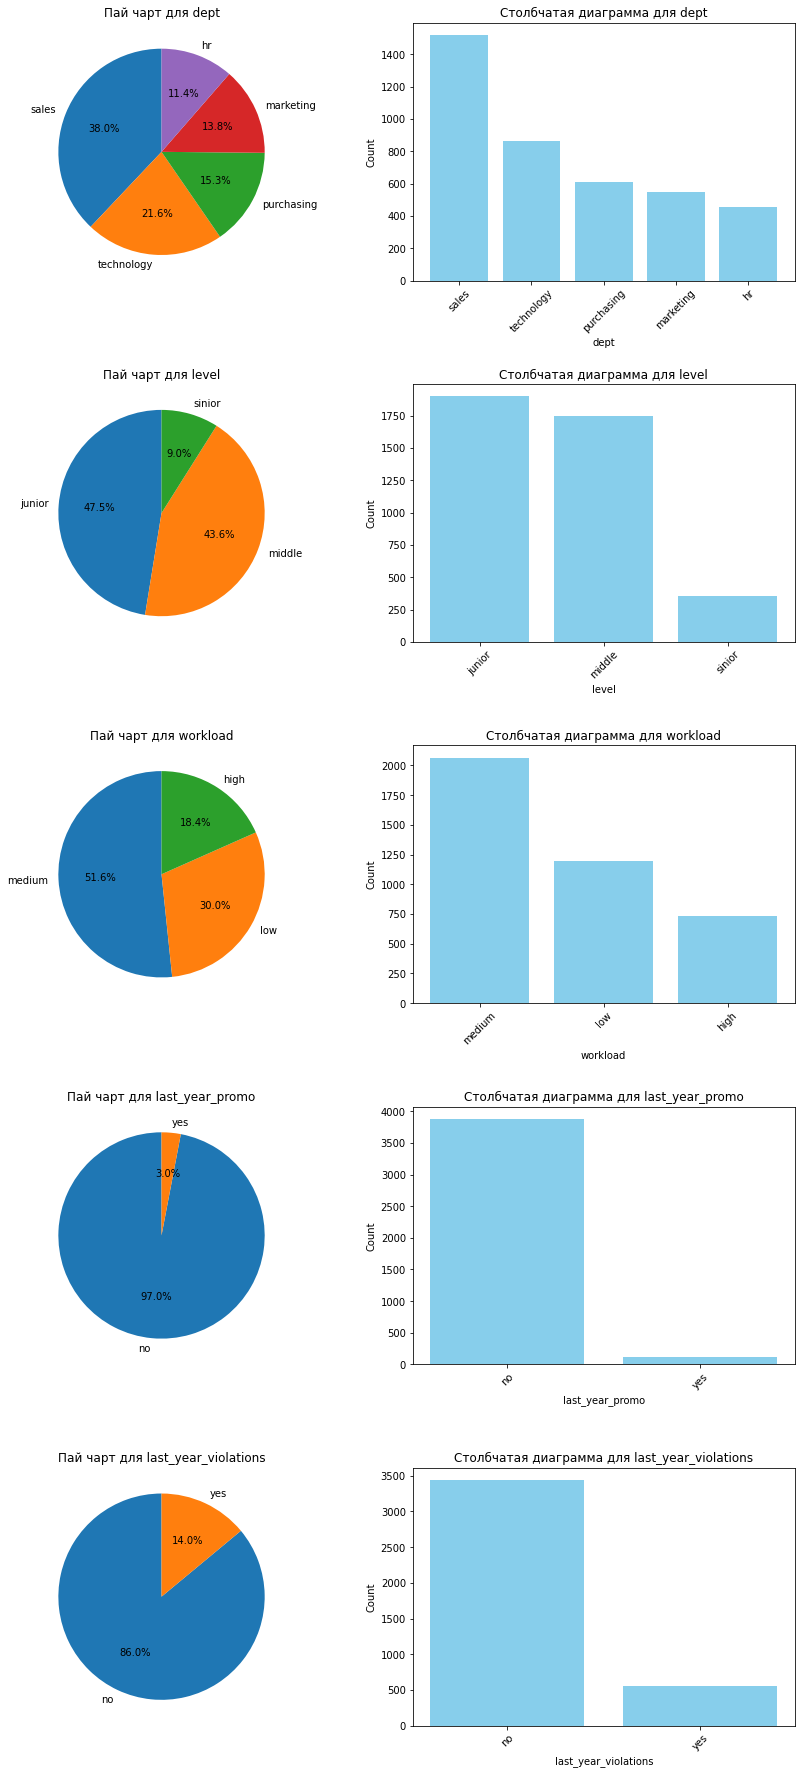

In [17]:
plot_pie_and_bar_charts(job_X_train)

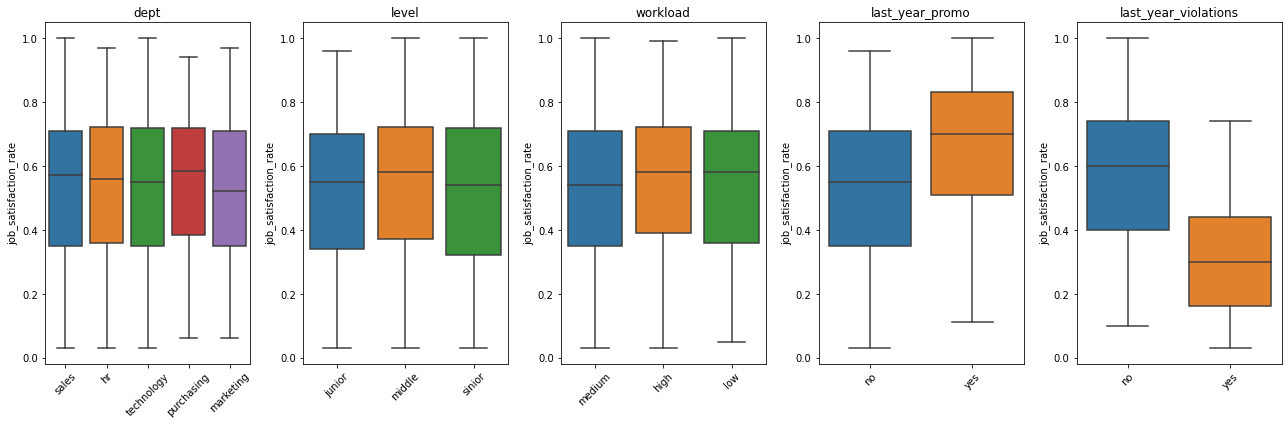

In [18]:
categorical_target_plot(job_X_train, 'job_satisfaction_rate')

- Наибольшее количество сотрудников (38%) работает в отделе "продаж", однако максимальное удовлетворение своим рабочим местом наблюдается среди сотрудников отдела "закупок". 
- 47,5% сотрудников занимают должности junior, а около 43,6% — middle. Больше всего удовлетворены своей работой сотрудники уровня middle. 
- Большинство сотрудников (51,6%) имеют среднюю загруженность. 
- Явным фактором удовлетворения является повышение в прошлом году или отсутствие замечаний за нарушения. 

Для большинства категориальных признаков будем использовать OneHotEncoder, а для признаков `level` и `workload` протестируем OrdinalEncoder.

#### Оценка корреляций между признаками и целевой переменной:

Проверим анализ корреляции между числовыми признаками с омощью метода Спирмена:

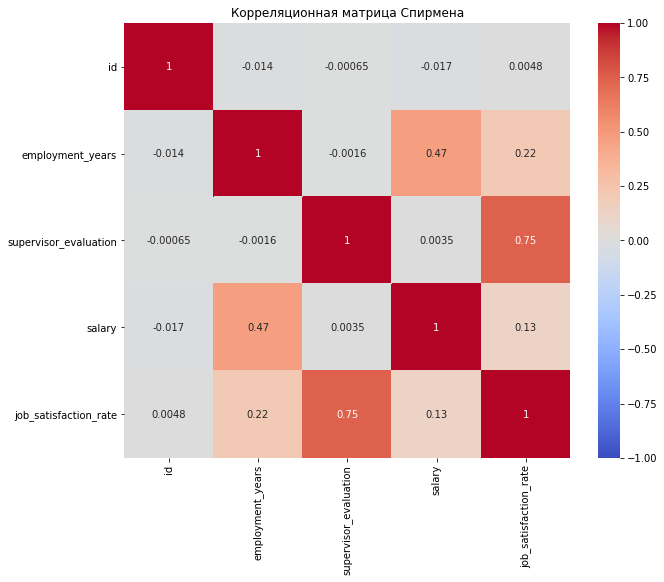

In [19]:
# Выбор всех числовых столбцов
numeric_cols = job_X_train.select_dtypes(include=['number']).columns

# Вычисление корреляционной матрицы Спирмена
correlation_matrix_spearman = job_X_train[numeric_cols].corr(method='spearman')

# Построение тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='coolwarm', vmin=-1, vmax=1) # Добавил vmin и vmax для корректного отображения
plt.title('Корреляционная матрица Спирмена') # Добавил заголовок
plt.show()

Целевой признак коррелирует сильно с `superviser_evaluation` - 0.75.

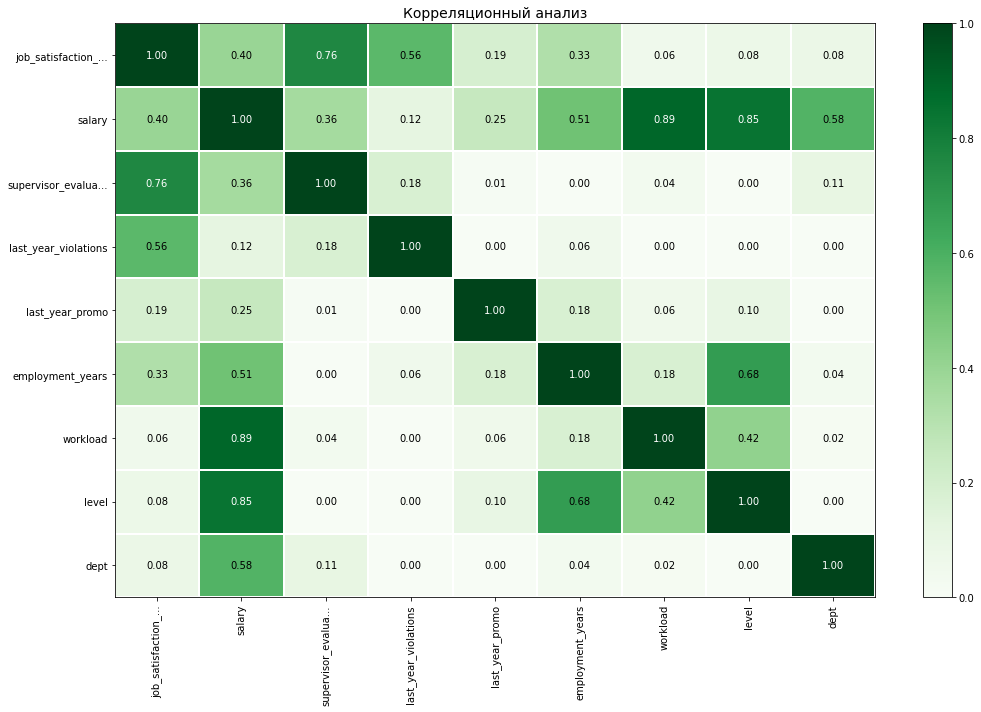

In [20]:
# Создаём список с наименованиями количественных признаков
interval_cols = ['job_satisfaction_rate']

# Считаем корреляции на тренировочной выборке
phik_overview = phik_matrix(job_X_train.drop('id', axis=1), interval_cols=interval_cols)

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'Корреляционный анализ',
    fontsize_factor=1,
    figsize=(15, 10),
)

Целевой признак коррелирует с несколькими признаками:
- `last_year_violations` - 0.56. Достаточно очевидно, что полученные замечания за нарушения трудового договора негативно влияют на удовлетворенность сотрудником своим рабочим местом.
- `supervisor_evaluation` - 0.76. Самая высокая корреляция таргета именно с этим признаком.
- Сильная корреляция у параметра `salary` и `workload` - 0.79, а также у `salary` и `level` - 0.85. Удалять признаки не будем, так как их не так много. 
- Утечка целевого признака не обнаружена.

Посмотрим на типы зависимостей параметров:

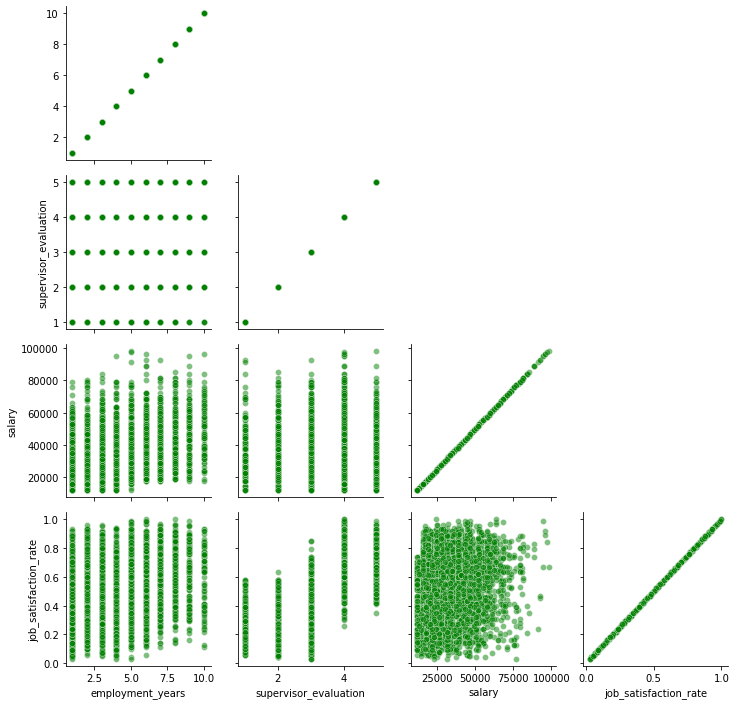

In [21]:
# Построим графики зависимостей признаков
dependency_type = sns.PairGrid(job_X_train.drop('id', axis=1), diag_sharey=False, corner=True)
dependency_type.map(sns.scatterplot, alpha=0.5, color='green')
dependency_type.add_legend()
plt.show()

- На графиках наблюдается нелинейная зависимость целевого признака `job_satisfaction_rate` от таких признаков, как `employment_years` и `supervisor_evaluation`. 
- Связь между таргетом и зарплатой сотрудников не имеет четкой формы. Это следует учитывать при построении модели.

<a id='Подготовка'></a>
### Подготовка данных

In [22]:
# Проверяем размерность и выводим первые пять записей в таблице
display(job_X_train.shape)
display(job_X_train.head(5))

(4000, 10)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


In [23]:
# Проверяем размерность и выводим первые пять записей в таблице
display(job_X_test.shape)
display(job_X_test.head(5))

(2000, 9)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


In [24]:
# Проверяем размерность и выводим первые пять записей в таблице
display(job_y_test.shape)
display(job_y_test.head(5))

(2000, 2)

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


Первые пять строк выборок не свопадают по `id`:
- индексуруем тренировочную выборку по `id`, проверим на дубликаты, удалив при неоюходимости, и потом разделим на таргет.
- а тестовые выборки объединим вначале, потом индексуруем по `id` и снова разделим таргет.

In [25]:
# Индексируем тренировочную выборку по id, чтобы упростить доступ и операции
job_X_train_ml = job_X_train.set_index('id')

# Проверим
job_X_train_ml.head(2)

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
155278,sales,junior,medium,2,no,no,1,24000,0.58
653870,hr,junior,high,2,no,no,5,38400,0.76


In [26]:
# Проверим тренировочную выборку на дубликаты
job_X_train_ml.duplicated().sum()

248

In [27]:
# Проверим тренировочную выборку на дубликаты
job_X_train_ml.drop_duplicates(inplace=True)

# Проверим
job_X_train_ml.duplicated().sum()

0

In [28]:
# Выделяем таргет (целевой признак) из тренировочной выборки
job_y_train_ml = job_X_train_ml['job_satisfaction_rate']

# Удаляем таргет из тренировочной выборки, оставляя только признаки
job_X_train_ml = job_X_train_ml.drop('job_satisfaction_rate', axis=1)

# Проверим
job_X_train_ml.head(2)

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
id,,,,,,,,
155278,sales,junior,medium,2,no,no,1,24000
653870,hr,junior,high,2,no,no,5,38400


In [29]:
job_y_train_ml.head(2)

id
155278    0.58
653870    0.76
Name: job_satisfaction_rate, dtype: float64

Первые строки по `id` теперь совпадают.

In [32]:
# Объединим тестовую и таргет выборку
job_test_full = job_X_test.merge(job_y_test, on='id')

# Индексируем тестовую выборку по id для аналогичных операций
job_test_full = job_test_full.set_index('id')

# Повторно выделяем таргет (целевой признак) из объединенной тестовой выборки
job_y_test_ml = job_test_full['job_satisfaction_rate']

# Удаляем таргет из объединенной тестовой выборки, оставляя только признаки
job_X_test_ml = job_test_full.drop('job_satisfaction_rate', axis=1)

# Отображаем первую строку из обработанных данных для проверки
display(job_X_test_ml.head(2))  # Тестовая выборка без таргета
display(job_y_test_ml.head(2))   # Таргет

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
id,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800
686555,hr,junior,medium,1,no,no,4,30000


id
485046    0.79
686555    0.72
Name: job_satisfaction_rate, dtype: float64

In [33]:
# Теперь проверим размерность таблиц, после удаления дубликатов в тренировочной выборке
display(job_X_train_ml.shape)
display(job_X_test_ml.shape)
display(job_y_train_ml.shape)
display(job_y_test_ml.shape)

(3752, 8)

(2000, 8)

(3752,)

(2000,)

#### Реализация пайплайна

In [34]:
detailed_df_analysis(job_X_train)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   4000 non-null   object 
 2   level                  4000 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


None

,count,mean,std,min,25%,50%,75%,max
id,4000.0,544957.621000,257883.104622,100954.00,322836.75,534082.50,771446.00,999521.0
employment_years,4000.0,3.718500,2.542513,1.00,2.00,3.00,6.00,10.0
supervisor_evaluation,4000.0,3.476500,1.008812,1.00,3.00,4.00,4.00,5.0
salary,4000.0,33926.700000,14900.703838,12000.00,22800.00,30000.00,43200.00,98400.0
job_satisfaction_rate,4000.0,0.533995,0.225327,0.03,0.36,0.56,0.71,1.0



Пропущенные значения:
                       count  percentage
id                         0         0.0
dept                       0         0.0
level                      0         0.0
workload                   0         0.0
employment_years           0         0.0
last_year_promo            0         0.0
last_year_violations       0         0.0
supervisor_evaluation      0         0.0
salary                     0         0.0
job_satisfaction_rate      0         0.0 

Количество дубликатов: 0

Информация о категориальных признаках:
dept => 5 уникальных значений
  - sales
  - hr
  - technology
  - purchasing
  - marketing

level => 3 уникальных значений
  - junior
  - middle
  - sinior

workload => 3 уникальных значений
  - medium
  - high
  - low

last_year_promo => 2 уникальных значений
  - no
  - yes

last_year_violations => 2 уникальных значений
  - no
  - yes



In [35]:
# Cоздаём списки с названиями признаков
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level', 'workload']
num_columns = ['employment_years', 'supervisor_evaluation', 'salary']

# Cоздаём пайплайны для подготовки признаков 
ohe_pipe = Pipeline([
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
])

ord_pipe = Pipeline([
    ('ord', OrdinalEncoder(
        categories=[
            ['junior', 'middle', 'senior'],
            ['medium', 'high', 'low']
        ],
        handle_unknown='use_encoded_value', unknown_value=np.nan)),
    ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
])

# Cоздаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', StandardScaler(), num_columns)
     ],
    remainder='passthrough'
)

# Cоздаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LinearRegression())
])

### Обучение моделей

#### Создание новой метрики SMAPE
(англ. symmetric mean absolute percentage error, «симметричное среднее абсолютное процентное отклонение»)

In [36]:
# Создаем новую метрику SMAPE
def smape(y_true, y_pred):
    """
    Функция принимает на вход массивы NumPy или объекты Series в pandas и возвращает значение метрики SMAPE
    (симметричное среднее абсолютное процентное отклонение)

    Args:
        y_true(np.array / pandas.Series): Массив с фактическими значениями данных
        y_pred(np.array / pandas.Series): Массив с прогнозируемыми значениями данных 

    Returns:
        None

    """
    numerator = np.abs(y_pred - y_true)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    diff = np.divide(numerator, denominator, out=np.zeros_like(numerator), where=denominator != 0)
    return np.mean(diff) * 100

# Создаём пользовательскую метрику
smape_score = make_scorer(smape, greater_is_better=False)

#### Подбор гиперпараметров множества моделей

In [37]:
# Сетка гиперпараметров для двух моделей (линейная регрессия и дерево решений)
parameters = [
    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
    },

    {
        'models': [DecisionTreeRegressor()],
        'models__max_depth': range(1, 21),
        'models__max_features': range(5, 11),
        'models__min_samples_leaf': range(1, 6),
        'models__min_samples_split': range(2, 6),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
    }
]

randomized_search = RandomizedSearchCV(
    pipe_final, 
    parameters, 
    cv=5,
    scoring=smape_score,
    n_jobs=-1
).fit(job_X_train_ml, job_y_train_ml)

In [38]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print('Метрика лучшей модели на кросс-валидации:', randomized_search.best_score_ * -1)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder(categories=[['junior',
                                              

Лучшей моделью получилась модель дерево решений с максимальной глубиной - 17 максимальным числом признаков, по которым ищется лучшее разбиение в дереве - 8.

Теперь проверим, как лучшая модель проявит себя на тестовой выборке. И рассчитаем метрику SMAPE.

In [39]:
y_pred_test = randomized_search.best_estimator_.predict(job_X_test_ml) 
smape_test = smape(job_y_test_ml, y_pred_test)
print ("Метрика SMAPE равна:", smape_test)

Метрика SMAPE равна: 13.927424447346915


/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Метрика получилась равной 13.9 что даже лучше, чем на тренировочной выборке, значит наша модель работает хорошо.

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


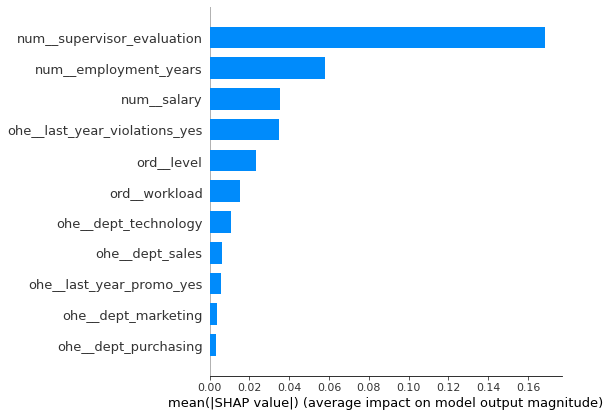

None

In [40]:
# Подготовим данные для SHAP-анализа
model = randomized_search.best_estimator_['models']
preprocessor_pipe = randomized_search.best_estimator_.named_steps['preprocessor']
X_train_scalled = preprocessor_pipe.fit_transform(job_X_train_ml)
X_test_scalled = preprocessor_pipe.transform(job_X_test_ml)
feature_names = randomized_search.best_estimator_[:-1].get_feature_names_out()

# Создаем Explainer
explainer = shap.TreeExplainer(model)

# Получаем SHAP-значения для данных
shap_values = explainer.shap_values(X_test_scalled)

# Визуализиурем важность признаков
display(shap.summary_plot(shap_values, X_test_scalled, feature_names=feature_names, plot_type="bar"))

- Признак `supervisor_evaluation` оказывает наибольшее влияние на предсказания модели, что подтверждается его высокой важностью, определённой еще на этапе корреляционного анализа. 
- На втором месте находится `employment_years`, что указывает на то, что удовлетворенность сотрудника своей работой в значительной степени зависит от этого признака, примерно наравне с должностью и уровнем зарплаты.

### Выводы

*Мы успешно решили первую задачу*: создали модель, способную предсказать уровень удовлетворенности сотрудника на основе данных заказчика.

Процесс обучения моделей был завершен, и на основе метрики SMAPE была выбрана наилучшая модель. Ею стала модель дерева решений с максимальной глубиной 17 и максимальным числом признаков для поиска оптимальных разбиений также равным 18. После тестирования на отложенной выборке метрика не изменилась значительно, что подтверждает хорошую работу модели.

Предположительно, дерево решений показало лучший результат по сравнению с линейной регрессией благодаря своей более высокой гибкости в настройке гиперпараметров.

**Дополнительно:**

Сравним производительность нашей модели с константной моделью, чтобы проверить, действительно ли наша модель лучше, чем простая стратегия предсказания среднего значения. Для этого нужно:

- Создать и обучить константную модель, например, с использованием DummyRegressor.
- Вычислить метрику на тестовой выборке для этой модели.
- Сравнить результаты нашей модели с результатами DummyRegressor.

In [41]:
# Создаём константную модель
dummy_model = DummyRegressor(strategy='mean')

# Обучаем на тренировочных данных
dummy_model.fit(job_X_train_ml, job_y_train_ml)

# Предсказываем значения на тестовой выборке
y_dummy_pred = dummy_model.predict(job_X_test_ml)

# Вычисляем метрику SMAPE для константной модели
smape_dummy = smape(job_y_test_ml, y_dummy_pred)
print("Метрика SMAPE для DummyRegressor:", smape_dummy)

# Сравнение с лучшей моделью
print("Метрика SMAPE для лучшей модели:", smape_test)

# Вывод результата
if smape_test < smape_dummy:
    print("Лучшая модель превосходит DummyRegressor.")
else:
    print("Лучшая модель не лучше, чем DummyRegressor. Проверьте ваши данные и модель.")

Метрика SMAPE для DummyRegressor: 38.262831018170885
Метрика SMAPE для лучшей модели: 13.927424447346915
Лучшая модель превосходит DummyRegressor.


## Задача 2: Предсказание увольнения

<a id='загрузка'></a>
### Загрузка данных

In [42]:
# Загружаем датасеты
quit_X_train = pd.read_csv('/datasets/train_quit.csv')
quit_X_test = pd.read_csv('/datasets/test_features.csv')
quit_y_test = pd.read_csv('/datasets/test_target_quit.csv')


In [43]:
# Проверим тренировочную выюорку
detailed_df_analysis(quit_X_train)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


None

,count,mean,std,min,25%,50%,75%,max
id,4000.0,552099.28375,260158.031387,100222.0,327785.75,546673.0,781497.75,999915.0
employment_years,4000.0,3.70150,2.541852,1.0,2.00,3.0,6.00,10.0
supervisor_evaluation,4000.0,3.47475,1.004049,1.0,3.00,4.0,4.00,5.0
salary,4000.0,33805.80000,15152.415163,12000.0,22800.00,30000.0,43200.00,96000.0



Пропущенные значения:
                       count  percentage
id                         0         0.0
dept                       0         0.0
level                      0         0.0
workload                   0         0.0
employment_years           0         0.0
last_year_promo            0         0.0
last_year_violations       0         0.0
supervisor_evaluation      0         0.0
salary                     0         0.0
quit                       0         0.0 

Количество дубликатов: 0

Информация о категориальных признаках:
dept => 5 уникальных значений
  - sales
  - purchasing
  - marketing
  - technology
  - hr

level => 3 уникальных значений
  - middle
  - junior
  - sinior

workload => 3 уникальных значений
  - high
  - medium
  - low

last_year_promo => 2 уникальных значений
  - no
  - yes

last_year_violations => 2 уникальных значений
  - no
  - yes

quit => 2 уникальных значений
  - no
  - yes



- Пропущенных значений в столбцах нет.
- Явные дубликаты не обнаружены.
- Предварительно, аномальных значений не обнаружено, но присутствуют выбросы в параметрах employment_years и salary, так как максимальные значения сильно отличаются от третей квартили. Изучим их на исследовательском этапе.
- С типами данных все в порядке

In [44]:
# А теперь тартгет
detailed_df_analysis(quit_y_test)

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


None

,count,mean,std,min,25%,50%,75%,max
id,2000.0,552765.2135,253851.326129,100298.0,339052.0,550793.0,765763.75,999029.0



Пропущенные значения:
      count  percentage
id        0         0.0
quit      0         0.0 

Количество дубликатов: 0

Информация о категориальных признаках:
quit => 2 уникальных значений
  - yes
  - no



Тут тоже всё ок.

In [45]:
detailed_df_analysis(quit_X_test)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


None

,count,mean,std,min,25%,50%,75%,max
id,2000.0,552765.2135,253851.326129,100298.0,339052.0,550793.0,765763.75,999029.0
employment_years,2000.0,3.6665,2.537222,1.0,1.0,3.0,6.00,10.0
supervisor_evaluation,2000.0,3.5265,0.996892,1.0,3.0,4.0,4.00,5.0
salary,2000.0,34066.8000,15398.436729,12000.0,22800.0,30000.0,43200.00,96000.0



Пропущенные значения:
                       count  percentage
id                         0        0.00
dept                       2        0.10
level                      1        0.05
workload                   0        0.00
employment_years           0        0.00
last_year_promo            0        0.00
last_year_violations       0        0.00
supervisor_evaluation      0        0.00
salary                     0        0.00 

Количество дубликатов: 0

Информация о категориальных признаках:
dept => 6 уникальных значений
  - marketing
  - hr
  - sales
  - purchasing
  - technology
  - nan
  -  

level => 3 уникальных значений
  - junior
  - middle
  - sinior
  - nan

workload => 4 уникальных значений
  - medium
  - low
  - high
  -  

last_year_promo => 2 уникальных значений
  - no
  - yes

last_year_violations => 2 уникальных значений
  - no
  - yes



- Есть пропущенные значения в столбцах `dept` в виде `" "` и `NaN`, `level` и `workload` в виде `" "`.
- Явные дубликаты не обнаружены.
- Предварительно, аномальных значений не обнаружено, но присутствуют выбросы в параметрах employment_years и salary, так как максимальные значения сильно отличаются от третей квартили. Изучим их на исследовательском этапе.
-  типами данных все в порядке

<a id='предобработка'></a>
### Предобработка данных

In [46]:
# Переведем id  в индексы для тренировчной выборки
quit_X_train = quit_X_train.set_index('id')

# Объединим тестовые таблицы
quit_full_test = quit_X_test.merge(quit_y_test, on='id')

# Переведем id  в индексы для тестовой выборки
quit_full_test = quit_full_test.set_index('id')

# Снова разделим таргет в тестовых данных
quit_X_test = quit_full_test.drop('quit', axis=1)
quit_y_test = quit_full_test['quit']

# Проверим
display(quit_X_train.head(2))
display(quit_X_test.head(2))
display(quit_y_test.head(2))

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
id,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,no
814010,sales,junior,medium,2,no,no,4,27600,no


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
id,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800
686555,hr,junior,medium,1,no,no,4,30000


id
485046    no
686555    no
Name: quit, dtype: object

In [47]:
display(quit_X_train.shape)
display(quit_X_test.shape)
display(quit_y_test.shape)

(4000, 9)

(2000, 8)

(2000,)

- Проиндексировали выборки по id

<a id='исследовательский'></a>
### Исследовательский анализ данных

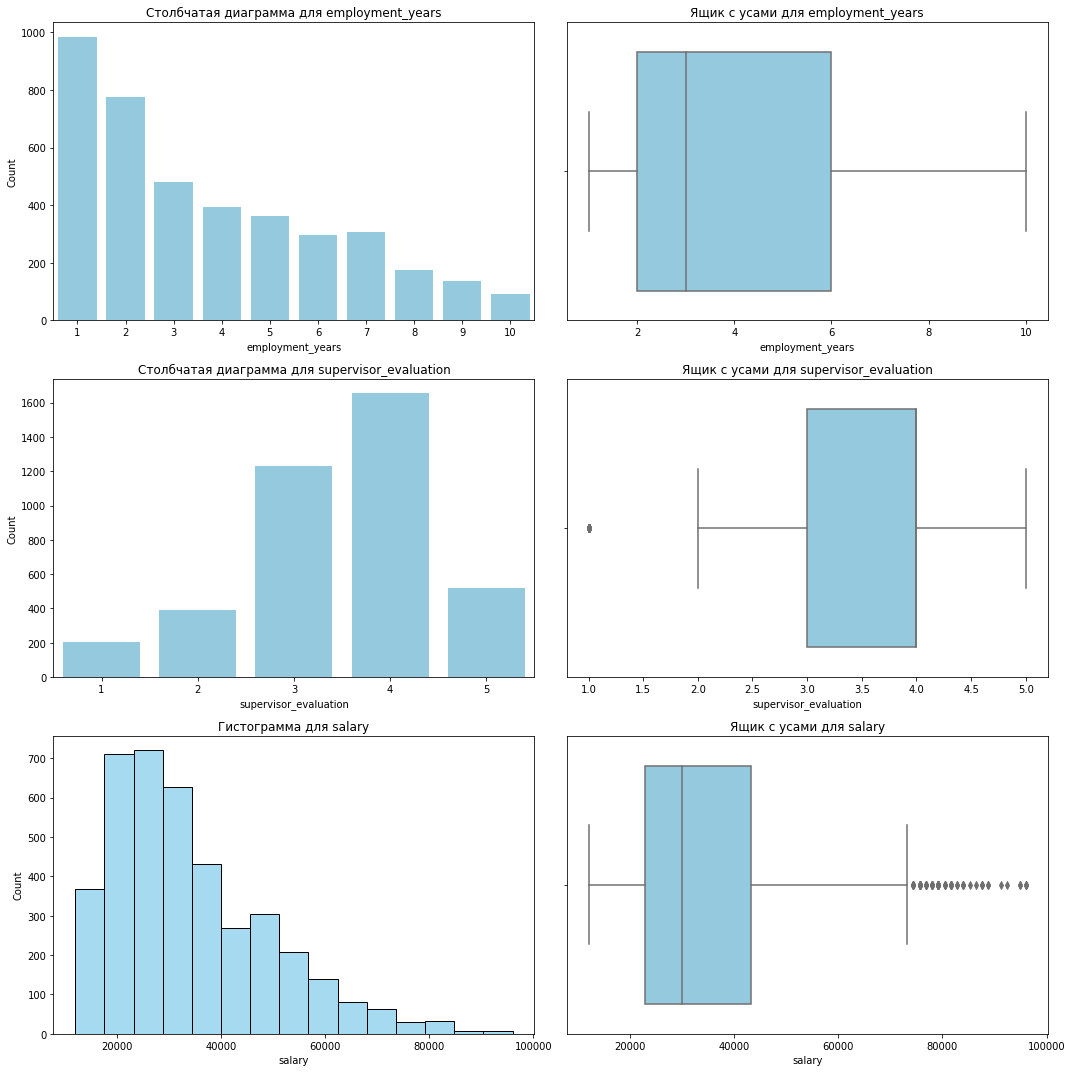

In [48]:
numeric_plot(quit_X_train)

Рспределния практически идентичны с исследовательским анализом в задаче 1.

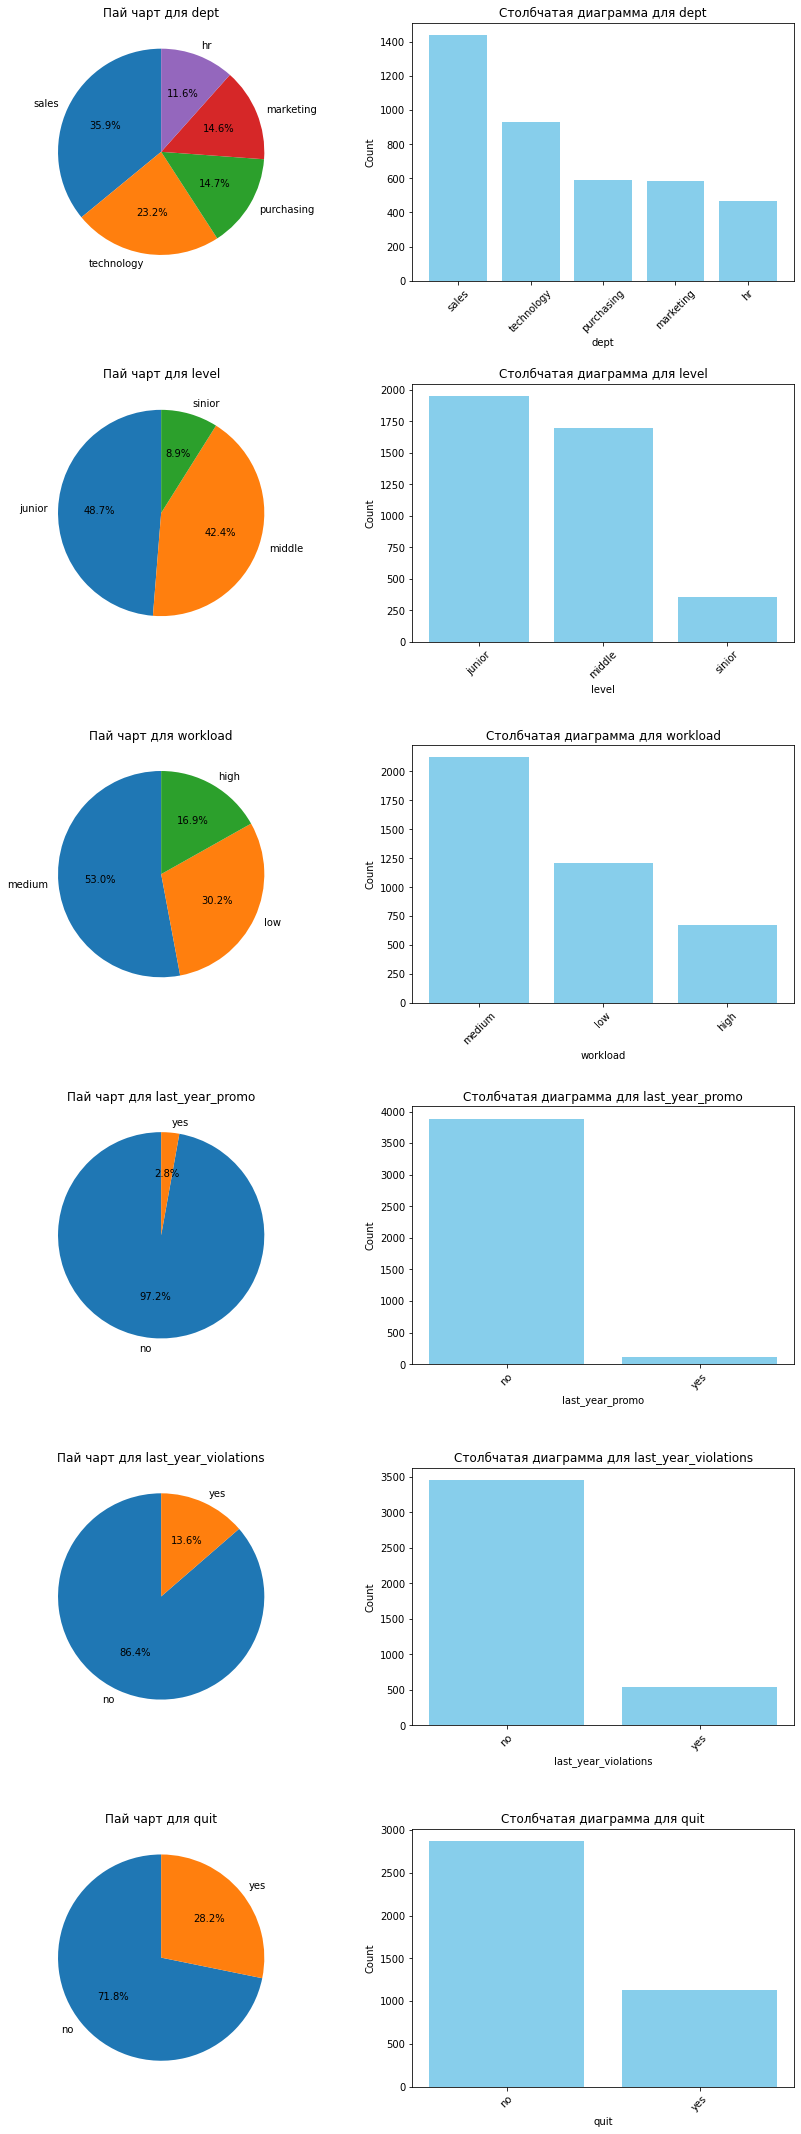

In [49]:
plot_pie_and_bar_charts(quit_X_train)

- Данные почти такие же как и в задаче 1 с различием лишь в несколько процентов в распределении каждого параметра, а общие тренды идентичны.
- Виден дисбаланс целевого признака. Это надо учестб при выборе метрики для модели МО.

In [50]:
# Проверка процентного распределения уникальных значений в quit_y_test
quit_y_test.value_counts(normalize=True) * 100

no     71.8
yes    28.2
Name: quit, dtype: float64

Соотношение значении параметра `quit` в тренировочной и тестовой таргет выборки идентичны.

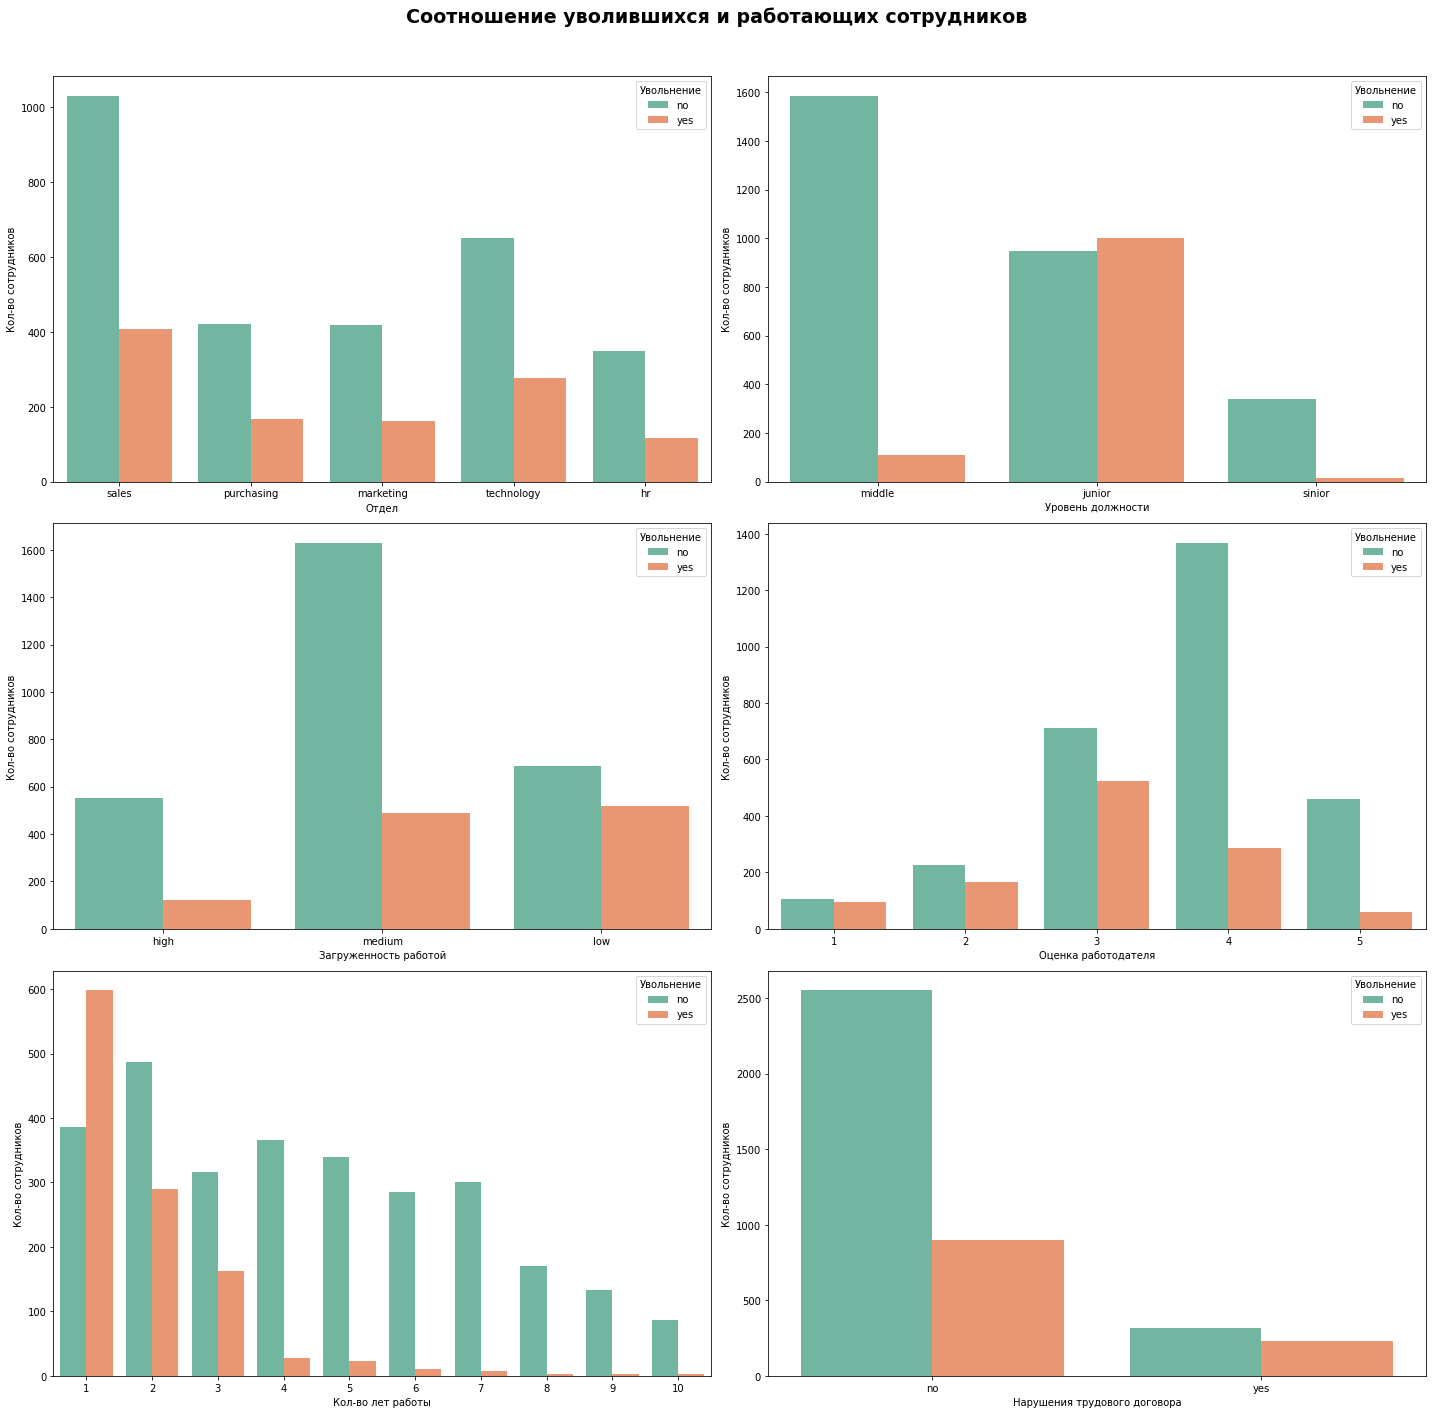

In [51]:
# Данные для построения графиков
columns_info = [
    ('dept', 'Отдел'),
    ('level', 'Уровень должности'),
    ('workload', 'Загруженность работой'),
    ('supervisor_evaluation', 'Оценка работодателя'),
    ('employment_years', 'Кол-во лет работы'),
    ('last_year_violations', 'Нарушения трудового договора')
]

# Создание графиков
fig, axes = plt.subplots(3, 2, figsize=(20, 20))
plt.suptitle('Соотношение уволившихся и работающих сотрудников', fontsize=19, fontweight='bold')

# Построение графиков с помощью цикла
for ax, (col, xlabel) in zip(axes.flat, columns_info):
    sns.countplot(x=col, data=quit_X_train, hue='quit', palette="Set2", ax=ax)
    ax.set(xlabel=xlabel, ylabel='Кол-во сотрудников')
    ax.legend(title='Увольнение')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Корректировка для отображения заголовка
plt.show()

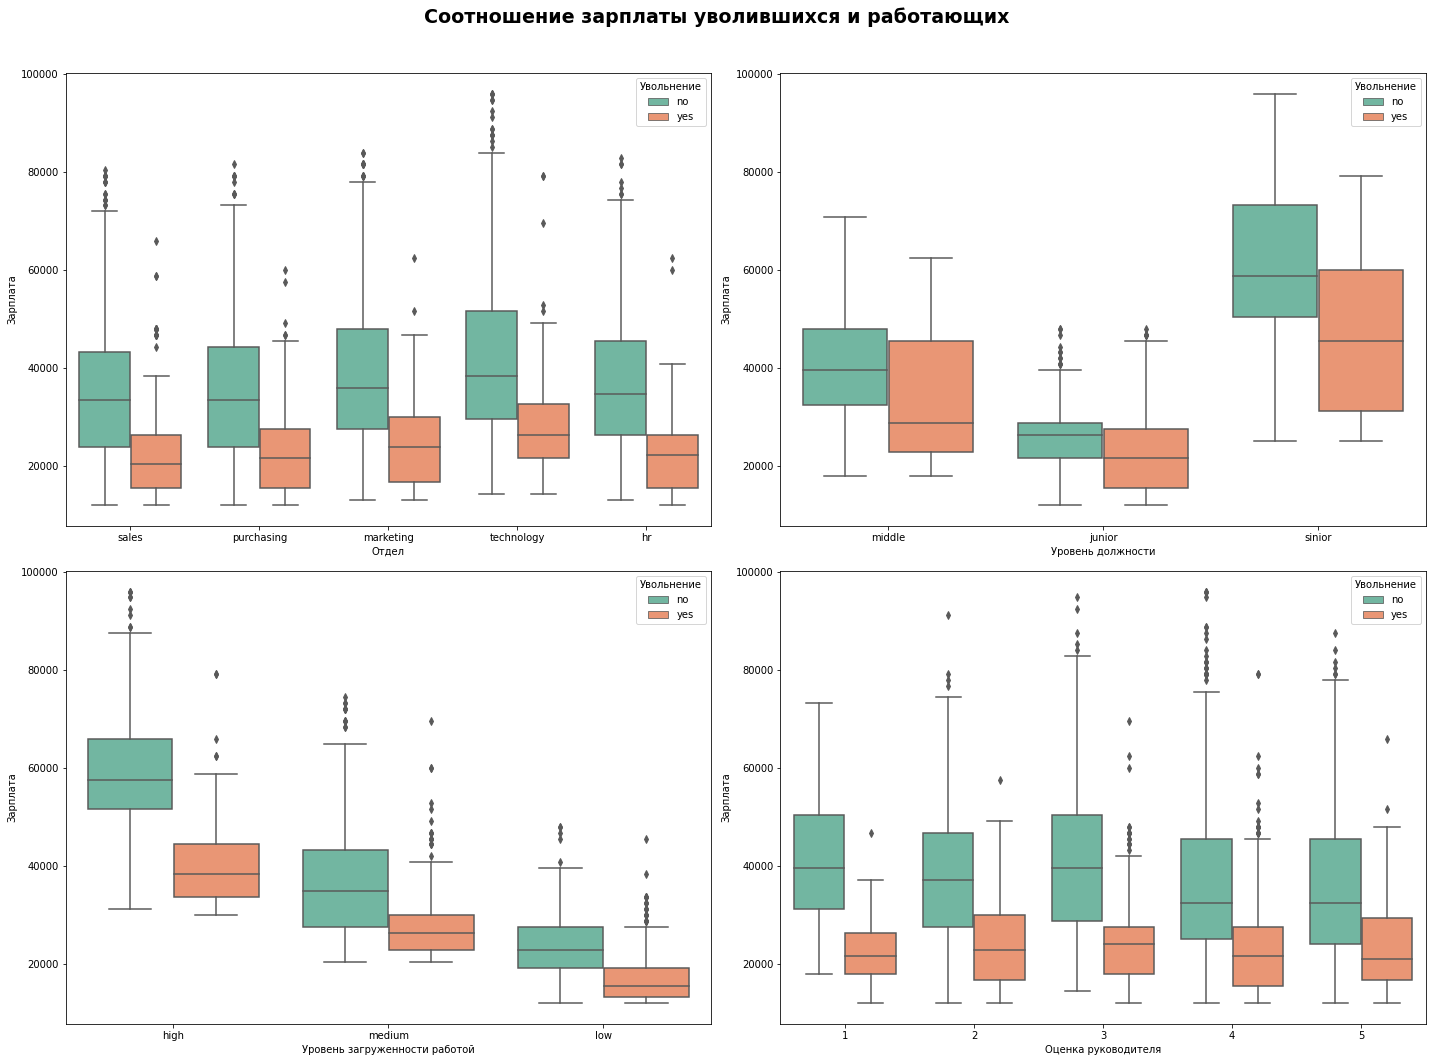

In [52]:
# Данные для построения графиков
columns_info = [
    ('dept', 'Отдел'),
    ('level', 'Уровень должности'),
    ('workload', 'Уровень загруженности работой'),
    ('supervisor_evaluation', 'Оценка руководителя')
]

# Создание сетки графиков
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
plt.suptitle('Соотношение зарплаты уволившихся и работающих', fontsize=19, fontweight='bold')

# Построение графиков в цикле
for ax, (x_col, xlabel) in zip(axes.flat, columns_info):
    sns.boxplot(x=x_col, y='salary', hue='quit', 
                palette='Set2', data=quit_X_train, ax=ax)
    ax.set(xlabel=xlabel, ylabel='Зарплата')
    ax.legend(title='Увольнение')

# Настройка расстояний
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

На основе графиков можно сделать вывод, что:
- чаще всего увольняются сотрудники с должностью junior, 
- низкой загруженностью (low), 
- невысокими оценками руководителя (от 1 до 3) и 
- небольшим стажем работы в компании. При этом отдел, в котором работает сотрудник, не оказывает значимого влияния на вероятность увольнения. 

Кроме того, анализ средних зарплат показывает, что уволившиеся сотрудники во всех категориях (отделы, уровни загруженности, должности и оценки руководителя) в среднем получают меньше, чем продолжающие работать. Таким образом, портрет типичного уволившегося сотрудника можно описать как недавно принятого на работу junior с низкой загруженностью, невысокой оценкой руководителя и небольшой зарплатой.

### Кореляционный анализ

Согласно мнению аналитиков, уровень удовлетворённости сотрудника работой может влиять на его решение уволиться. Чтобы проверить это утверждение, добавим в тестовую выборку с целевым признаком "Увольнение" целевой признак из первой задачи (удовлетворённость работой) и вычислим корреляцию между ними.

In [53]:
# Преобразуем Series в DataFrame
quit_y_test_df = quit_y_test.to_frame(name='quit')  # Создаем DataFrame с именем столбца 'quit'
job_y_test_ml_df = job_y_test_ml.to_frame(name='satisfaction')  # Создаем DataFrame с именем столбца 'satisfaction'

# Объединяем данные по признаку 'id'
data = quit_y_test_df.merge(job_y_test_ml_df, left_index=True, right_index=True)

# Проверяем результат
data.head()

,quit,satisfaction
id,,
485046,no,0.79
686555,no,0.72
467458,no,0.64
418655,no,0.60
789145,no,0.75


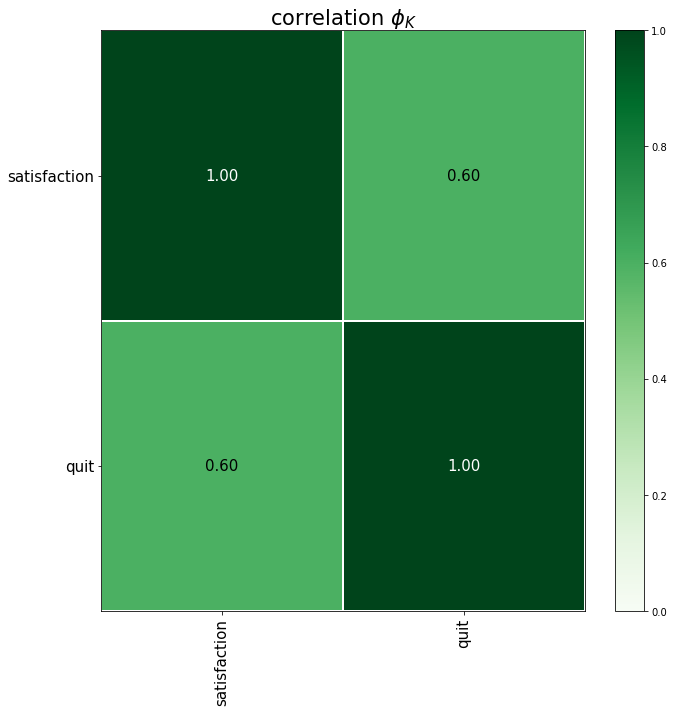

In [54]:
# Указываем список колонок с числовыми данными для анализа
# В данном случае 'job_satisfaction_rate' - это уровень удовлетворённости работой
interval_cols = ['job_satisfaction_rate']

# Вычисляем матрицу корреляции φ_K для указанных данных
# φ_K (phik) используется для анализа корреляции между категориальными и числовыми переменными
phik_overview = phik_matrix(data, interval_cols=interval_cols)

# Строим график корреляционной матрицы
plot_correlation_matrix(
    phik_overview.values,          # Значения корреляционной матрицы
    x_labels=phik_overview.columns,  # Подписи оси X (названия колонок)
    y_labels=phik_overview.index,    # Подписи оси Y (названия строк)
    vmin=0, vmax=1,                  # Диапазон значений для цветовой шкалы
    color_map='Greens',              # Цветовая палитра для отображения
    title=r'correlation $\phi_K$',   # Заголовок графика
    fontsize_factor=1.5,             # Коэффициент увеличения шрифта
    figsize=(10, 10)                 # Размер графика
)

Связь умеренно-положительная, значит удовлетворенность работой значительно влияет на целевой признак, поэтому до обучения моделей нам нужно будет добавить этот признак в тренировочную и тестовую выборки.

Построим хитмап для визуального анализа того, какие признаки оказывают влияние на каждый из классов: "сотрудник уволиться" VS. "сотрудник не уволиться".

Так как наши числовые параметры `['employment_years', 'supervisor_evaluation', 'salary']` дискретные, то лучше использовать  корреляцию Спирмена для дискретных числовых и порядковых признаков `['level', 'workload']`. Этот метод показывает не линейные монотонные связи между признаками. 

А для категориальных непорядковых признаков `['last_year_promo', 'last_year_violations']` используем Cramér's V, который оценивает силу ассоциации между двумя категориальными переменными.

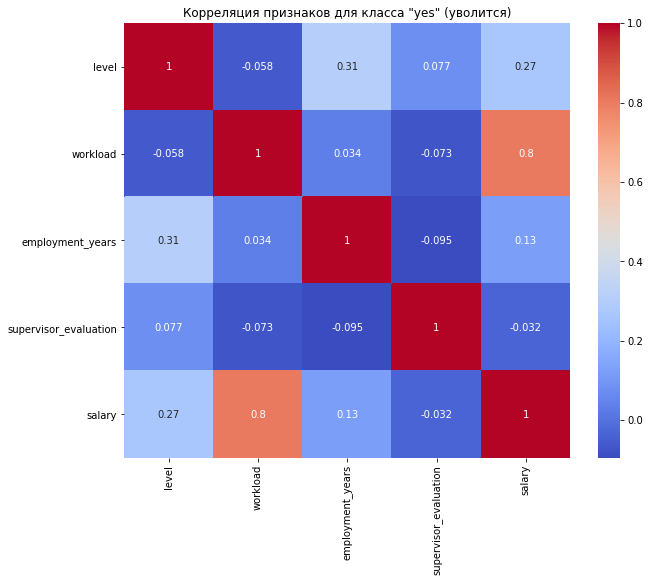

In [55]:
# Создаем копию таблицы для кодирования категориальных признаков
encoded_df = quit_X_train.copy()

# Выбираем столбцы для OrdinalEncoder (порядковые признаки)
ord_columns = ['level', 'workload']

# Применяем OrdinalEncoder
ord_encoder = OrdinalEncoder(
    categories=[
        ['junior', 'middle', 'senior'],  # Уровни
        ['low', 'medium', 'high']  # Нагрузка
    ],
    handle_unknown='use_encoded_value', unknown_value=np.nan
)

# Кодируем порядковые данные
encoded_df[ord_columns] = ord_encoder.fit_transform(encoded_df[ord_columns])

# Разделяем данные на классы "yes" и "no" для целевого признака quit
quit_yes = encoded_df[encoded_df['quit'] == 'yes'].drop('quit', axis=1)
quit_no = encoded_df[encoded_df['quit'] == 'no'].drop('quit', axis=1)

# Корреляция для класса "yes"
correlation_yes = quit_yes.corr(method='spearman')

# Построение тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_yes, annot=True, cmap='coolwarm')
plt.title('Корреляция признаков для класса "yes" (уволится)')
plt.show()

- Значение 0,8 между `salary` и `workload` означает сильную положительную монотонную корреляцию: По мере увеличения одного из признаков тоже будет увеличиваться. Например, это может свидетельствовать о том, что сотрудники с высокими зарплатами и высокой рабочей нагрузкой более склонны к увольнению. 

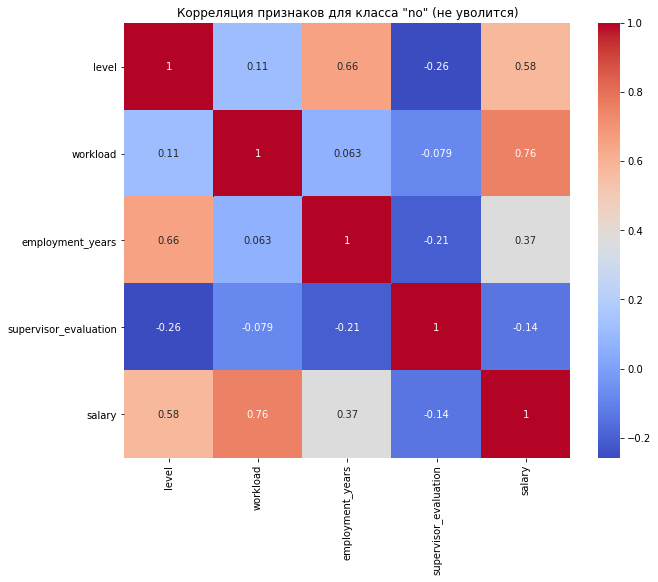

In [56]:
# Корреляция для класса "no"
correlation_no = quit_no.corr(method='spearman')

# Построение тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_no, annot=True, cmap='coolwarm')
plt.title('Корреляция признаков для класса "no" (не уволится)')
plt.show()

- Для обеих категорий (уволился и не уволился) наблюдается высокая положительная корреляция между `salary` и `workload`, но значения немного различаются (0,8 для уволившихся и 0,76 для оставшихся). Однако стоит подчеркнуть, что это не означает, что высокая нагрузка вызывает увольнение. Это скорее означает, что в обеих группах есть тенденция, что с ростом зарплаты увеличивается рабочая нагрузка.
- Корреляция между `employment_years` и `level`, 0.66, означает, что чем больше лет работы у сотрудника, тем выше его уровень в компании. Это демонстрируют типичное поведение сотрудников, которые остаются в компании. Рабочая нагрузка возрастает с ростом зарплаты, а также увеличивается уровень сотрудника по мере накопления опыта.
- Корреляция между `salary` и `level` говорит о том, что с увеличением уровня сотрудника (например, с junior до middle или senior) его зарплата обычно растет. Это может удерживать сотрудника от увольнения.

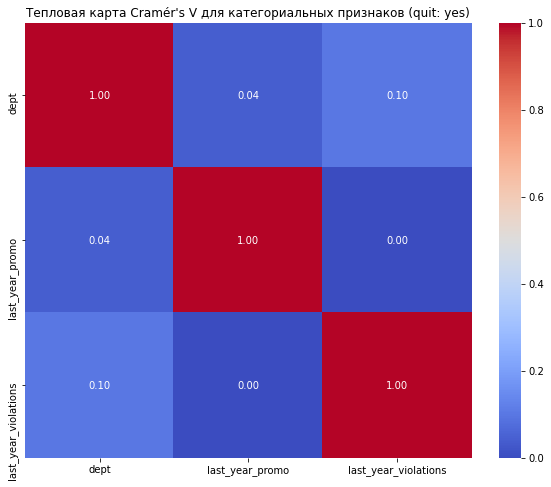

In [57]:
def cramers_v(confusion_matrix):
    """Вычисление коэффициента Cramér's V."""
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

# Пример: создаём DataFrame для категориальных признаков
categorical_columns = ['dept', 'last_year_promo', 'last_year_violations']

# Разделяем данные на два класса: "quit: yes" и "quit: no"
quit_yes = encoded_df[encoded_df['quit'] == 'yes'][categorical_columns]
quit_no = encoded_df[encoded_df['quit'] == 'no'][categorical_columns]

# Создаём матрицу для Cramér's V
cramers_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

# Заполняем матрицу Cramér's V
for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 == col2:
            cramers_matrix.loc[col1, col2] = 1.0  # Самокорреляция
        else:
            confusion_matrix_yes = pd.crosstab(quit_yes[col1], quit_yes[col2])
            cramers_matrix.loc[col1, col2] = cramers_v(confusion_matrix_yes.values)

# Преобразуем в числовой формат
cramers_matrix = cramers_matrix.astype(float)

# Построение тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Тепловая карта Cramér\'s V для категориальных признаков (quit: yes)')
plt.show()

Тут сильных ассоциации нет.

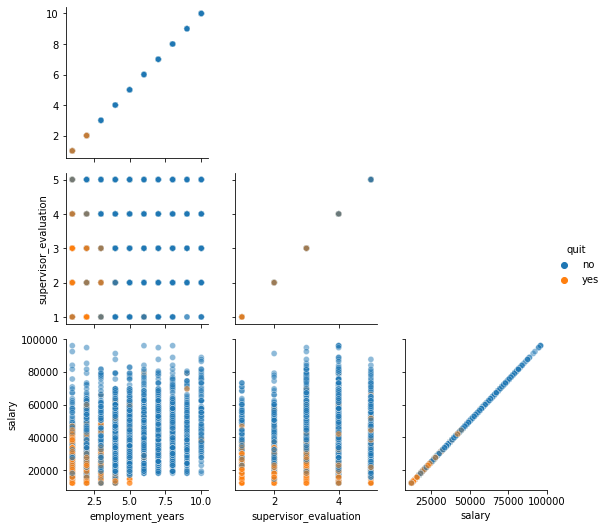

In [58]:
# Построим графики зависимостей признаков
dependency = sns.PairGrid(quit_X_train, diag_sharey=False, corner=True, hue='quit')
dependency.map(sns.scatterplot, alpha=0.5)
dependency.add_legend()
plt.show()

<a id='добавление'></a>
### Добавление нового признака

Добавим признак удовлетворённости работой в тестовую и тренировочную выборки. Для этого используем лучшую модель из первой задачи, чтобы получить предсказания уровня удовлетворённости. Затем добавим эти предсказания в виде нового столбца к каждой выборке.

In [59]:
# Добавляем предсказания уровня удовлетворенности работой в quit_X_test
# полученной в процессе обучения, для предсказания уровня удовлетворенности 
# на тестовой выборке job_X_test_ml.
quit_X_test['job_satisfaction_rate_pred'] = y_pred_test

# Проверяем
quit_X_test.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate_pred
id,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,0.864000
686555,hr,junior,medium,1,no,no,4,30000,0.675000
467458,sales,middle,low,5,no,no,4,19200,0.690000
418655,sales,middle,low,6,no,no,4,19200,0.692000
789145,hr,middle,medium,5,no,no,5,40800,0.826667


In [60]:
# Добавляем предсказания уровня удовлетворенности работой в quit_X_train.
quit_X_train['job_satisfaction_rate_pred'] = randomized_search.best_estimator_.predict(quit_X_train)

# Проверяем
quit_X_train.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate_pred
id,,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,no,0.650000
814010,sales,junior,medium,2,no,no,4,27600,no,0.853529
155091,purchasing,middle,medium,5,no,no,1,37200,no,0.326667
257132,sales,junior,medium,2,no,yes,3,24000,yes,0.350000
910140,marketing,junior,medium,2,no,no,5,25200,no,0.791667


Данные готовы к подготовке данных для обучения моделей.

<a id='подготовка'></a>
### Подготовка данных

In [61]:
# Проверим данные на пропуски и дубликаты
detailed_df_analysis(quit_X_train)

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate_pred
id,,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,no,0.650000
814010,sales,junior,medium,2,no,no,4,27600,no,0.853529
155091,purchasing,middle,medium,5,no,no,1,37200,no,0.326667
257132,sales,junior,medium,2,no,yes,3,24000,yes,0.350000
910140,marketing,junior,medium,2,no,no,5,25200,no,0.791667



<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 723290 to 853842
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   dept                        4000 non-null   object 
 1   level                       4000 non-null   object 
 2   workload                    4000 non-null   object 
 3   employment_years            4000 non-null   int64  
 4   last_year_promo             4000 non-null   object 
 5   last_year_violations        4000 non-null   object 
 6   supervisor_evaluation       4000 non-null   int64  
 7   salary                      4000 non-null   int64  
 8   quit                        4000 non-null   object 
 9   job_satisfaction_rate_pred  4000 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 472.8+ KB


None

,count,mean,std,min,25%,50%,75%,max
employment_years,4000.0,3.701500,2.541852,1.00,2.000,3.00,6.00,10.0000
supervisor_evaluation,4000.0,3.474750,1.004049,1.00,3.000,4.00,4.00,5.0000
salary,4000.0,33805.800000,15152.415163,12000.00,22800.000,30000.00,43200.00,96000.0000
job_satisfaction_rate_pred,4000.0,0.538894,0.216859,0.06,0.353,0.54,0.69,0.9875



Пропущенные значения:
                            count  percentage
dept                            0         0.0
level                           0         0.0
workload                        0         0.0
employment_years                0         0.0
last_year_promo                 0         0.0
last_year_violations            0         0.0
supervisor_evaluation           0         0.0
salary                          0         0.0
quit                            0         0.0
job_satisfaction_rate_pred      0         0.0 

Количество дубликатов: 1413

Информация о категориальных признаках:
dept => 5 уникальных значений
  - sales
  - purchasing
  - marketing
  - technology
  - hr

level => 3 уникальных значений
  - middle
  - junior
  - sinior

workload => 3 уникальных значений
  - high
  - medium
  - low

last_year_promo => 2 уникальных значений
  - no
  - yes

last_year_violations => 2 уникальных значений
  - no
  - yes

quit => 2 уникальных значений
  - no
  - yes



In [62]:
# Удаляем дубликаты
quit_X_train = quit_X_train.drop_duplicates()

In [63]:
# Проверка
quit_X_train.duplicated().sum()

0

In [64]:
# Выделяем таргет из тренировочных данных
quit_y_train = quit_X_train['quit']

# Удаляем таргет из тренировчных данных
quit_X_train = quit_X_train.drop('quit', axis=1)

In [65]:
# Кодируем таргет через LabelEncoder
le = LabelEncoder()

# Применяем fit_transform для обучающего набора
quit_y_train = le.fit_transform(quit_y_train)

# Применяем transform для тестового набора (quit_y_test - это Series)
quit_y_test = le.transform(quit_y_test)

In [66]:
display(quit_X_train.shape)
display(quit_y_train.shape)
display(quit_X_test.shape)
display(quit_y_test.shape)

(2587, 9)

(2587,)

(2000, 9)

(2000,)

### Реализация пайплайна

In [67]:
# Cоздаём списки с названиями признаков
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level', 'workload']
num_columns = ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate_pred']

# Cоздаём пайплайны для подготовки признаков 
ohe_pipe = Pipeline([
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
])

ord_pipe = Pipeline([
    ('ord', OrdinalEncoder(
        categories=[
            ['junior', 'middle', 'senior'],
            ['medium', 'high', 'low']
        ],
        handle_unknown='use_encoded_value', unknown_value=np.nan)),
    ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
])

# Cоздаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', StandardScaler(), num_columns)
     ],
    remainder='passthrough'
)

# Обновляем модель в итоговом пайплайне
pipe_final_2 = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LogisticRegression())
])

<a id='обучение'></a>
### Обучение моделей

#### Подбор гиперпараметров множества моделей

In [68]:
param_grid_2 = [
    
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(1, 21),
        'models__min_samples_leaf': range(1, 6),
        'models__min_samples_split': range(2, 6),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
 
    {
        'models': [KNeighborsClassifier(n_jobs=-1, weights='distance')],
        'models__n_neighbors': range(2, 20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler()],
    },

    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE,
            class_weight='balanced',
            solver='liblinear', 
        )],
        'models__penalty': ['l1', 'l2'],
        'models__C': range(1, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler()],
    }
]

Запустим обучение перебором, используя метод RandomizedSearchCV для экономии ресурсов и для ускорения работы алгоритма. Для оценки качества моделей будем использовать метрику ROC_AUC, как самую универсальную и сбалансированную метрику, которая не зависит от порога классификации.

In [69]:
randomized_search = RandomizedSearchCV(
    pipe_final_2, 
    param_grid_2, 
    cv=5,
    n_iter=20,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
).fit(quit_X_train, quit_y_train)

In [70]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на кросс-валидации:', randomized_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder(categories=[['junior',
                                              

In [71]:
y_test_proba = randomized_search.predict_proba(quit_X_test)[:,1]
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(quit_y_test, y_test_proba)}')

Метрика ROC-AUC на тестовой выборке: 0.9078001837254787


/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Критерий успеха по условию задачи: ROC-AUC ≥0.91 на тестовой выборке. 

Результат метрики получился 0.907, что с округлением равно 0.91, то есть практически такой же, как на тренировочной выборке. Значит наша модель справляется хорошо. Критерий успеха выполнен.

Проанализируем важность признаков для модели для этого воспользуемся модулем shap.

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


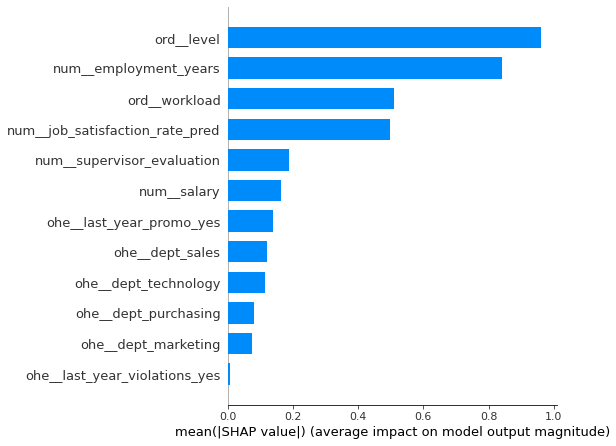

None

In [72]:
# Подготовим данные для SHAP-анализа
model = randomized_search.best_estimator_['models']
preprocessor_pipe = randomized_search.best_estimator_.named_steps['preprocessor']
X_train_scalled = preprocessor_pipe.fit_transform(quit_X_train)
X_test_scalled = preprocessor_pipe.transform(quit_X_test)
feature_names = randomized_search.best_estimator_[:-1].get_feature_names_out()

# Создаем Explainer
explainer = shap.LinearExplainer(model, X_train_scalled)

# Получаем SHAP-значения для данных
shap_values = explainer.shap_values(X_test_scalled)

# Визуализиурем важность признаков
display(shap.summary_plot(shap_values, X_test_scalled, feature_names=feature_names, plot_type="bar"))

Мы видим, что для нашей модели наиболее важным оказался признак `level` и `employment_years`, а вот признаки с нарушением трудового договора (`last_year_violations`) и отделом (`dept`) похоже мало влияют на нашу модель.

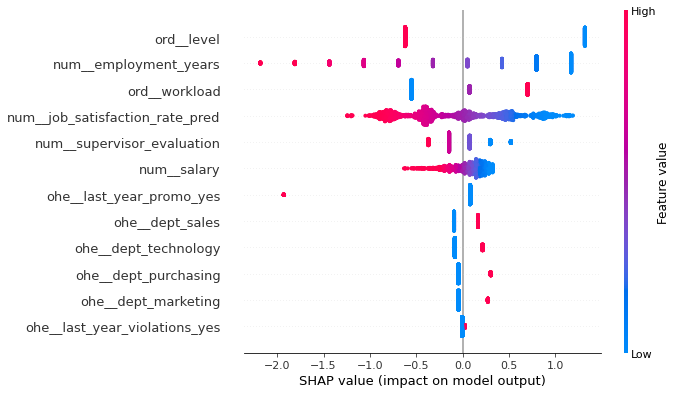

In [73]:
# Преобразуем shap_values в объект Explanation
shap_values_explanation = shap.Explanation(values=shap_values, 
                                           base_values=explainer.expected_value, 
                                           data=X_test_scalled, 
                                           feature_names=feature_names)

# Визуализируем важность признаков
shap.plots.beeswarm(shap_values_explanation, max_display=16)

Вероятность вольнения сотрудника повышают:
- небольшой стаж работы
- не высокий уровень должности
- низкий уровень удовлетворенности работой
- низкая зарплата
- низкая оценка супервайзера

<a id='выводы'></a>
### Выводы

- Сначала перебрали гиперпараметры 3 моделей в пайплайне при помощи `RandomizedSearchCV`:
    - *LogisticRegression*
    - *DecisionTreeClassifier*
    - *KNeighborsClassifier*
    
- После перебора нашли лучшую модель: `LogisticRegression(C=6, class_weight='balanced', random_state=42, solver='liblinear')`
    - **ROC-AUC** на тестовой выборке - `0.9078001837254787`, что равно критерию успеха ROC-AUC ≥0.91.

- Признак `employment_years` оказывает значительное влияние на решения модели. Примерно такой же вес имеет признак `level`. Получается, что два этих показателя являются ключевыми при решении сотрудника **"уволиться"**

<a id='общий'></a>
## Общий вывод

**Исходные данные и предобработка:**

**Для задачи 1:** 

- Данные были получены из нескольких источников: `train_job_satisfaction_rate.csv`, `test_features.csv` и `test_target_job_satisfaction_rate.csv` (целевой признак тестовой выборки). 
 
Прежде чем приступить к моделированию, была выполнена предобработка данных:

- `job_X_train`: Были обнаружены пропуски `NaN` в параметрах dept и level, которые были обработаны при помощи пайплайна (SimpleImputer). Была исправлена орфографическая ошибка `sinior` на `senior` в параметре `level`. Дубликаты не обнаружены. С типами данных все ок.

- `job_X_test`: Были обнаружены пропуски, орфографическая ошибка `sinior` в параметре `level`. Дубликаты не обнаружены. С типами данных все ок. Аномалий не было обнаружено.

- `job_y_test`: С тестовой таблицей таргета все в порядке.

- Таблицы были проиндексированы по `id`.

**Для задачи 2:**

- Данные были получены из нескольких источников: `train_quit.csv`, `test_features.csv` и `test_target_quit.csv`. 

- `quit_X_train`: С тренировочной таблицей все в порядке.

- Таблицы были проиндексированы по `id`.

**Исследовательский анализ:**

**Для задачи 1:** 
- Признак `employment_years` имеет неправильное распределение, с преобладанием сотрудников с опытом работы до 3 лет. 
- `Salary` скошено вправо, с наличием выбросов, но их не следует удалять, так как они могут быть репрезентативными для высокооплачиваемых сотрудников. 
- В распределении `job_satisfaction_rate` наблюдаются три пика, что свидетельствует о нерегулярной удовлетворенности. 
- Наибольшее количество сотрудников работает в отделе `"продаж"`, а наибольшее удовлетворение — в отделе `"закупок"`. 
- Признак `supervisor_evaluation` имеет высокую корреляцию с целевым признаком. 

**Для задачи 2:**
- Анализ показал, что увольняются сотрудники с должностью junior, низкой загруженностью и низкими оценками от руководителя. 
- В целом, уволившиеся сотрудники имеют более низкие зарплаты. Это позволяет выделить портрет типичного уволившегося сотрудника — junior с низкой загруженностью, невысокой оценкой и зарплатой.

Визуальный анализ с помощью хитмэпа показал какие признаки оказывают влияние на каждый из классов: "сотрудник уволиться" VS. "сотрудник не уволиться" :

- *Уволиться*: Сильная положительная корреляция между `salary` и `workload` (0,8), что может свидетельствовать о том, что сотрудники с высокими зарплатами и высокой нагрузкой более склонны к увольнению.
- *Не уволится*: В обеих группах (уволился и не уволился) наблюдается положительная корреляция между `salary` и `workload`, но значения немного различаются (0,8 и 0,76 соответственно). Это указывает на то, что увеличение зарплаты связано с увеличением нагрузки. Корреляция между `employment_years` и `level` (0,66) показывает, что с ростом опыта сотрудника увеличивается его уровень в компании. Корреляция между `salary` и `level` указывает, что повышение уровня сотрудника обычно сопровождается увеличением зарплаты, что может способствовать удержанию в компании.

**Корреляционный анализ:**

- Для **задачи 1** наблюдается сильная корреляция целевого признака с `last_year_violations` (0.56), `supervisor_evaluation` (0.76) и `salary` с `workload` (0.75). Утечка целевого признака не обнаружена. 
- Для **задачи 2**, удовлетворенность работой имеет умеренно-положительную корреляцию с целевым признаком, что подчеркивает её важность в предсказании увольнений.

**Для поиска лучшей модели использовался Pipeline с классификаторами:**
- **Для задачи 1:** LinearRegression и DecisionTreeRegressor.
- **Для задачи 2:** LogisticRegression, DecisionTreeRegressor, KNeighborsClassifier и SVC.

**Для подбора гиперпараметров:** 
- **Для задачи 1:** применен RandomizedSearchCV с метрикой SMAPE. После настройки гиперпараметров лучшей моделью оказалась DecisionTreeClassifier, которая показала наилучшие результаты по метрике SMAPE. После проверки на тестовой выборке значение метрики осталось примерно на том же уровне, показав SMAPE ≤ 15. значит модель работает хорошо.
- **Для задачи 2:** применен RandomizedSearchCV с метрикой ROC AUC из-за несбалансированного целевого признака. После настройки гиперпараметров лучшей моделью оказалась LogisticRegression, которая показала наилучшие результаты по метрике ROC AUC. После проверки на тестовой выборке значение метрики осталось примерно на том же уровне, показав ROC-AUC ≥0.91.

**SHAP анализ для оценки важности признаков:**
- **Для задачи 1:** Признак `supervisor_evaluation` является самым важным для предсказаний, что подтверждается его высокой значимостью в корреляционном анализе, следом идет `employment_years`, указывающий на связь удовлетворенности с опытом работы.
- **Для задачи 2:** Наибольшее влияние на модель оказывают признаки `level` и `employment_years`, в то время как признаки, связанные с нарушениями трудового договора (`last_year_violations`) и отделом (`dept`), имеют минимальное влияние.

**Рекомендации бизнесу:**

- **Оценка труда:** Важно уделить внимание оценке труда сотрудников, так как это сильно влияет на их удовлетворенность работой. Регулярные оценки от руководителей (например, через `supervisor_evaluation`) могут значительно повысить уровень удовлетворенности.

- **Текучка кадров:** Текучка — естественный процесс. Однако можно снизить ее, предлагая дополнительные бонусы и активности для сотрудников на ранних этапах (1-2 года работы), такие как корпоративы, премии, соцгарантии и поддержка карьерного роста.

- **Отдел продаж:** Обратите внимание на отдел продаж и зарплаты. Возможно, стоит предложить более привлекательные условия для фиксации сотрудников на более длительный срок, например, добавление гибкости в график работы, включая возможность дистанционной работы.

- **Удовлетворенность:** Удовлетворенность работой — ключевой фактор при увольнении. Работайте над созданием среды, в которой сотрудники наслаждаются своей деятельностью, что поможет уменьшить отток.

**Рекомендации для улучшения ситуации:**

- Фокусироваться на поддержке сотрудников с меньшим опытом (особенно в первые 2 года).
- Разработать программы для удержания сотрудников, улучшая условия работы и карьерного роста.
- Разработать программы по развитию руководителей и созданию условий для повышения мотивации сотрудников на разных уровнях.